In [1]:
import sys
import os
from typing import Dict
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)
sys.path.insert(0, os.path.join(project_root, 'src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

from src.data.data_loader import YahooDataLoader
from config.settings import DataConfig

plt.rcParams['figure.figsize'] = (18, 12)

# Data Preparation

In [2]:
data_config = DataConfig(
    timeframes=["1h"],
    symbols=["SPY"],
    cache_enabled=True,
    cache_dir="../data/cache"
)

data_loader = YahooDataLoader(data_config)

end_date = datetime.now()
start_date = end_date - timedelta(days=365)

print(f"Loading price data for SPY from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

Loading price data for SPY from 2024-09-14 to 2025-09-14


In [3]:
symbol = "SPY"
timeframe = "1h"

spy_prices_df = data_loader.load_data(
    symbol=symbol,
    start_date=start_date,
    end_date=end_date,
    timeframe=timeframe
)

print(f"Successfully loaded {len(spy_prices_df)} rows of {timeframe} data for {symbol}")
print(f"Date range: {spy_prices_df.index.min()} to {spy_prices_df.index.max()}")
print(f"\nData shape: {spy_prices_df.shape}")
print(f"\nColumns: {list(spy_prices_df.columns)}")

Successfully loaded 1731 rows of 1h data for SPY
Date range: 2024-09-16 09:30:00-04:00 to 2025-09-12 15:30:00-04:00

Data shape: (1731, 8)

Columns: ['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock splits', 'capital gains']


In [4]:
spy_prices_df.head()

,open,high,low,close,volume,dividends,stock splits,capital gains
Datetime,,,,,,,,
2024-09-16 09:30:00-04:00,561.750000,562.919983,560.859985,561.478821,6951743,0.0,0.0,0.0
2024-09-16 10:30:00-04:00,560.909973,561.539978,559.900024,560.830017,5125936,0.0,0.0,0.0
2024-09-16 11:30:00-04:00,560.820007,561.419983,560.340027,561.389893,3354915,0.0,0.0,0.0
2024-09-16 12:30:00-04:00,561.380005,561.909973,560.789978,561.715027,3311704,0.0,0.0,0.0
2024-09-16 13:30:00-04:00,561.710022,562.599976,561.609985,562.549988,3520039,0.0,0.0,0.0


In [5]:
spy_prices_df.describe()

,open,high,low,close,volume,dividends,stock splits,capital gains
count,1731.000000,1731.000000,1731.000000,1731.000000,1.731000e+03,1731.000000,1731.0,1731.0
mean,593.106973,594.278229,591.921879,593.129957,7.696235e+06,0.004142,0.0,0.0
std,30.334463,29.751906,30.750347,30.316240,5.299099e+06,0.086223,0.0,0.0
min,489.190002,497.589996,481.799988,493.790009,1.422477e+06,0.000000,0.0,0.0
25%,572.884979,574.104980,571.872894,572.889984,4.466555e+06,0.000000,0.0,0.0
50%,593.864990,595.159973,592.679993,593.895020,6.508879e+06,0.000000,0.0,0.0
75%,607.700012,608.279999,607.134979,607.709930,9.436520e+06,0.000000,0.0,0.0
max,658.505005,659.109985,658.070007,658.505005,9.226401e+07,1.966000,0.0,0.0


In [6]:
spy_returns_df = pd.DataFrame(index=spy_prices_df.index)

spy_returns_df['open_return'] = spy_prices_df['open'].pct_change() * 100
spy_returns_df['high_return'] = spy_prices_df['high'].pct_change() * 100
spy_returns_df['low_return'] = spy_prices_df['low'].pct_change() * 100
spy_returns_df['close_return'] = spy_prices_df['close'].pct_change() * 100

spy_returns_df['intrabar_return'] = ((spy_prices_df['high'] - spy_prices_df['low']) / spy_prices_df['open']) * 100

spy_returns_df['body_return'] = ((spy_prices_df['close'] - spy_prices_df['open']) / spy_prices_df['open']) * 100

spy_returns_df = spy_returns_df.dropna()

print(f"Returns data shape: {spy_returns_df.shape}")

Returns data shape: (1730, 6)


In [7]:
spy_returns_df.head()

,open_return,high_return,low_return,close_return,intrabar_return,body_return
Datetime,,,,,,
2024-09-16 10:30:00-04:00,-0.149537,-0.245151,-0.171159,-0.115553,0.292374,-0.014255
2024-09-16 11:30:00-04:00,-0.016039,-0.021369,0.078586,0.099830,0.192567,0.101616
2024-09-16 12:30:00-04:00,0.099853,0.087277,0.080300,0.057916,0.199507,0.059678
2024-09-16 13:30:00-04:00,0.058787,0.122796,0.146224,0.148645,0.176246,0.149537
2024-09-16 14:30:00-04:00,0.147755,0.021329,0.040961,-0.051547,0.156423,-0.049769


In [8]:
spy_returns_df.describe()

,open_return,high_return,low_return,close_return,intrabar_return,body_return
count,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000
mean,0.010139,0.009832,0.010110,0.010053,0.407870,0.004661
std,0.443746,0.397052,0.440774,0.433127,0.416485,0.333041
min,-4.179969,-3.126474,-4.605395,-3.971065,0.063532,-2.271798
25%,-0.124788,-0.096909,-0.112939,-0.115333,0.195933,-0.113575
50%,0.018200,0.006547,0.020989,0.013581,0.294406,0.009932
75%,0.152708,0.110504,0.148221,0.140680,0.486375,0.129707
max,4.974061,6.562788,4.873161,4.947324,8.456836,4.962042


## Prices Analysis

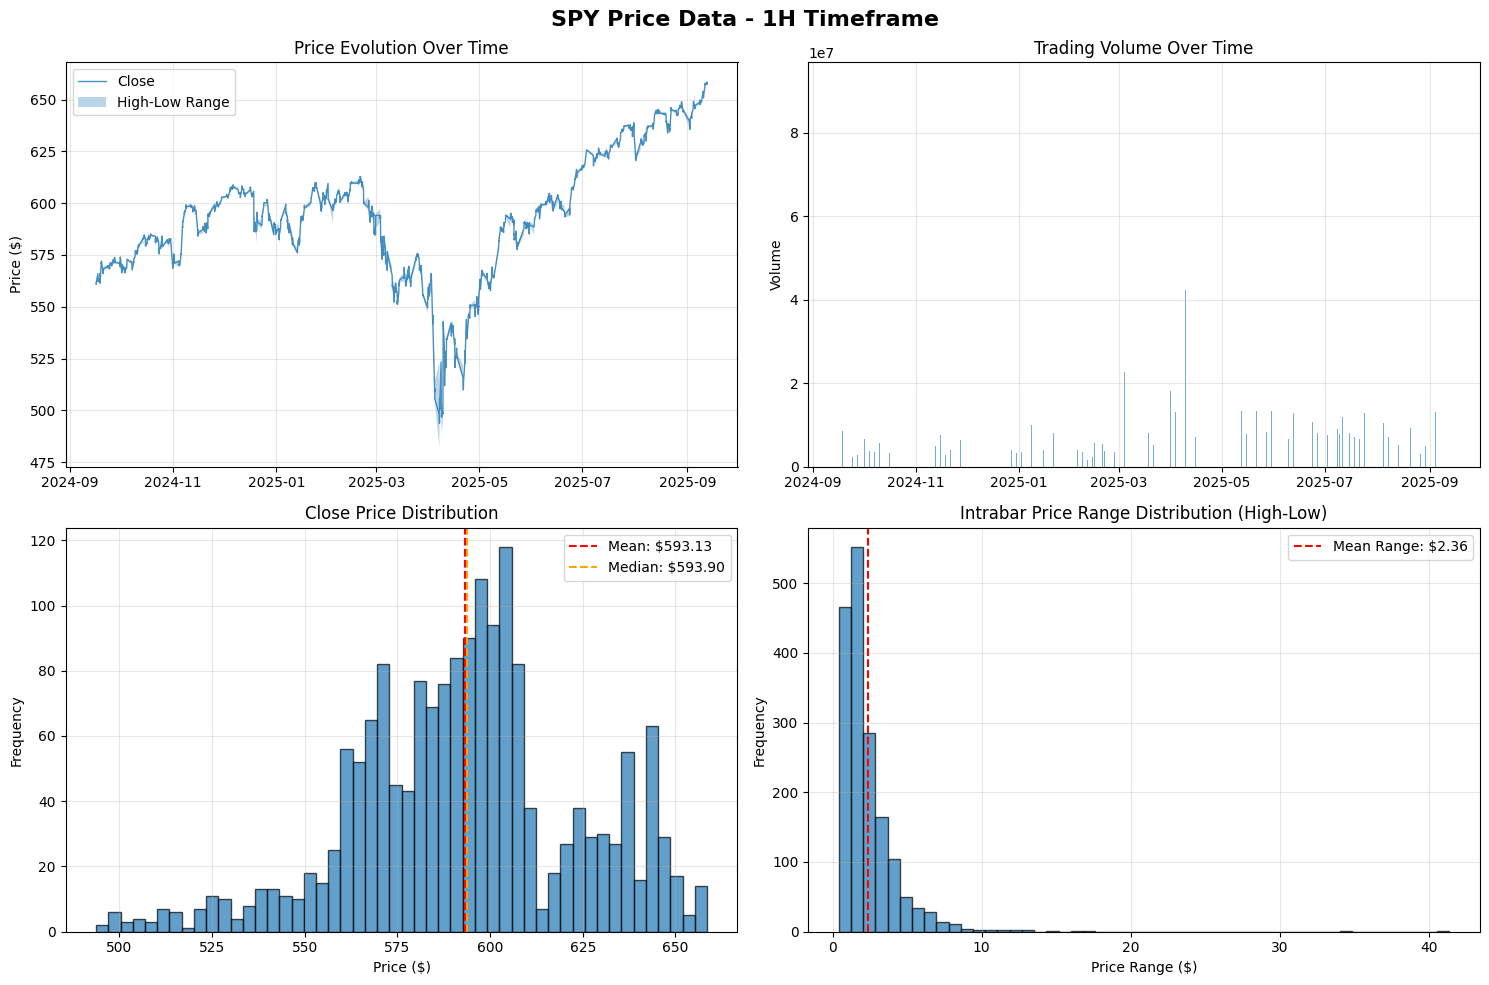

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'{symbol} Price Data - 1H Timeframe', fontsize=16, fontweight='bold')

axes[0, 0].plot(spy_prices_df.index, spy_prices_df['close'], label='Close', alpha=0.8, linewidth=1)
axes[0, 0].fill_between(spy_prices_df.index, spy_prices_df['low'], spy_prices_df['high'], 
                       alpha=0.3, label='High-Low Range')
axes[0, 0].set_title('Price Evolution Over Time')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].bar(spy_prices_df.index, spy_prices_df['volume'], alpha=0.6, width=0.02)
axes[0, 1].set_title('Trading Volume Over Time')
axes[0, 1].set_ylabel('Volume')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(spy_prices_df['close'], bins=50, alpha=0.7, edgecolor='black')
axes[1, 0].axvline(spy_prices_df['close'].mean(), color='red', linestyle='--', 
                  label=f'Mean: ${spy_prices_df["close"].mean():.2f}')
axes[1, 0].axvline(spy_prices_df['close'].median(), color='orange', linestyle='--', 
                  label=f'Median: ${spy_prices_df["close"].median():.2f}')
axes[1, 0].set_title('Close Price Distribution')
axes[1, 0].set_xlabel('Price ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

price_range = spy_prices_df['high'] - spy_prices_df['low']
axes[1, 1].hist(price_range, bins=50, alpha=0.7, edgecolor='black')
axes[1, 1].axvline(price_range.mean(), color='red', linestyle='--', 
                  label=f'Mean Range: ${price_range.mean():.2f}')
axes[1, 1].set_title('Intrabar Price Range Distribution (High-Low)')
axes[1, 1].set_xlabel('Price Range ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
print(f"Price Statistics for {symbol}:")
print(f"Close Price - Mean: ${spy_prices_df['close'].mean():.2f}, Std: ${spy_prices_df['close'].std():.2f}")
print(f"Price Range - Mean: ${price_range.mean():.2f}, Std: ${price_range.std():.2f}")
print(f"Volume - Mean: {spy_prices_df['volume'].mean():,.0f}, Std: {spy_prices_df['volume'].std():,.0f}")

Price Statistics for SPY:
Close Price - Mean: $593.13, Std: $30.32
Price Range - Mean: $2.36, Std: $2.16
Volume - Mean: 7,696,235, Std: 5,299,099


## Returns Analysis

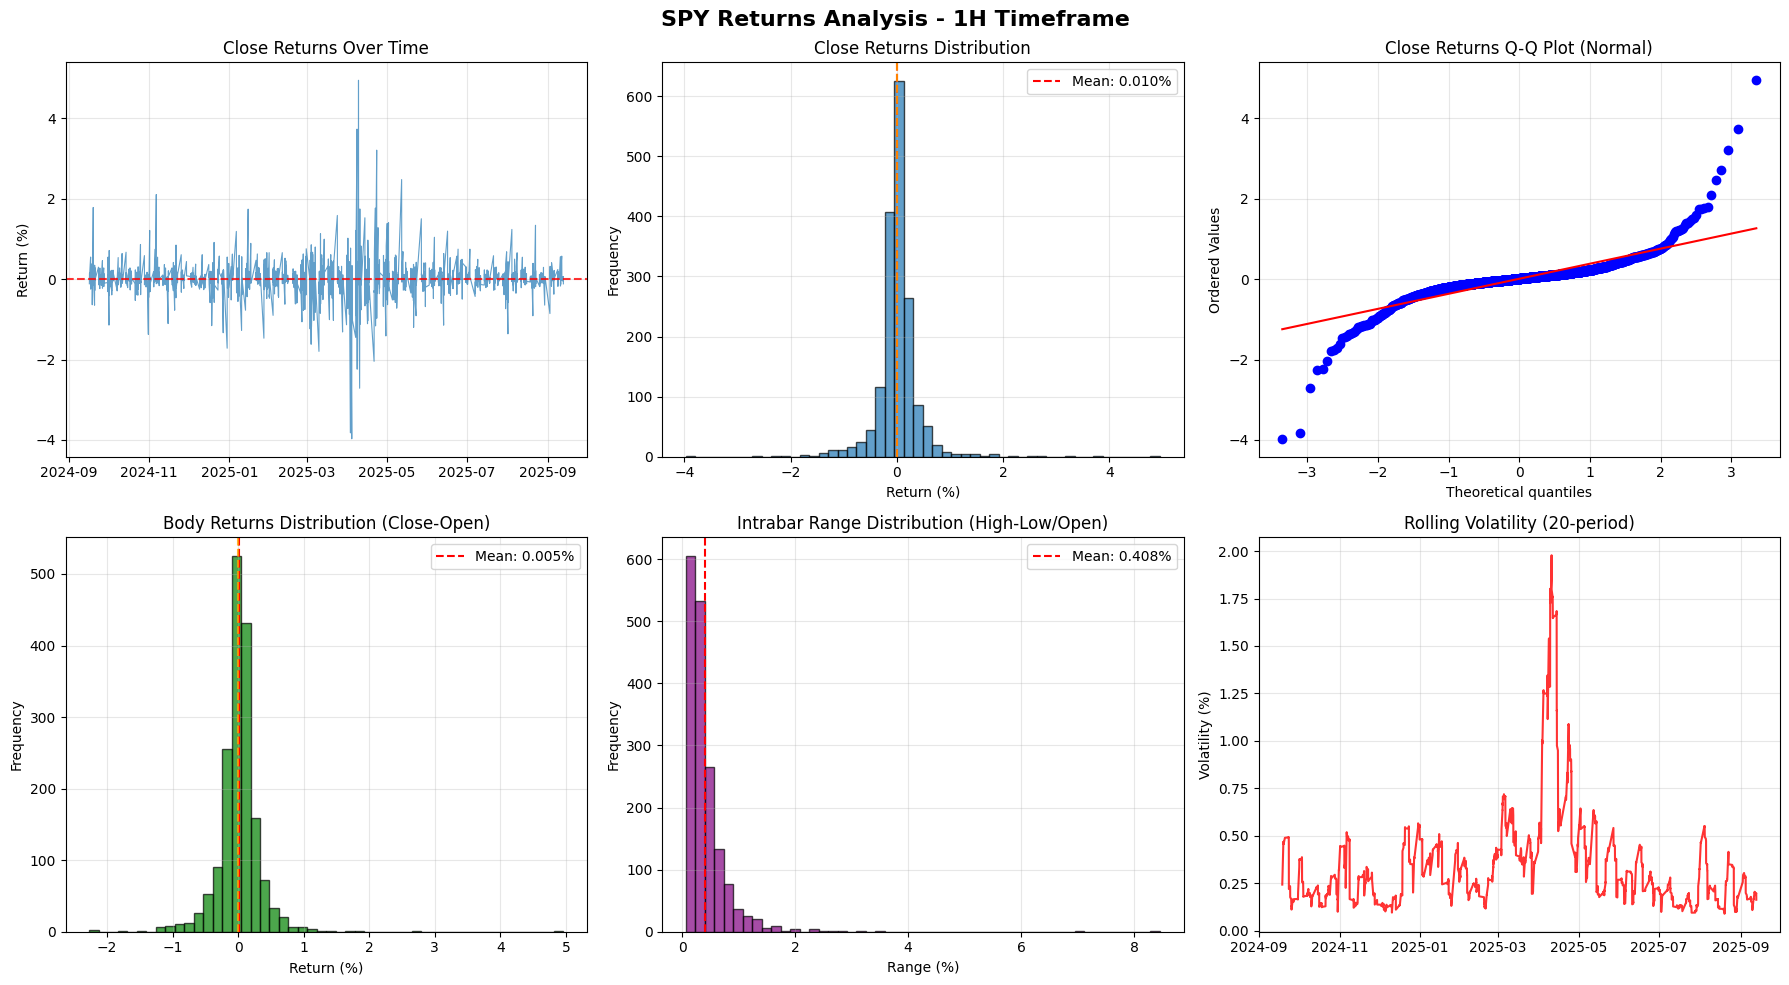

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(f'{symbol} Returns Analysis - 1H Timeframe', fontsize=16, fontweight='bold')

axes[0, 0].plot(spy_returns_df.index, spy_returns_df['close_return'], alpha=0.7, linewidth=0.8)
axes[0, 0].axhline(y=0, color='red', linestyle='--', alpha=0.8)
axes[0, 0].set_title('Close Returns Over Time')
axes[0, 0].set_ylabel('Return (%)')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(spy_returns_df['close_return'], bins=50, alpha=0.7, edgecolor='black')
axes[0, 1].axvline(spy_returns_df['close_return'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {spy_returns_df["close_return"].mean():.3f}%')
axes[0, 1].axvline(0, color='orange', linestyle='--', alpha=0.8)
axes[0, 1].set_title('Close Returns Distribution')
axes[0, 1].set_xlabel('Return (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

from scipy import stats
stats.probplot(spy_returns_df['close_return'].dropna(), dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('Close Returns Q-Q Plot (Normal)')
axes[0, 2].grid(True, alpha=0.3)

axes[1, 0].hist(spy_returns_df['body_return'], bins=50, alpha=0.7, edgecolor='black', color='green')
axes[1, 0].axvline(spy_returns_df['body_return'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {spy_returns_df["body_return"].mean():.3f}%')
axes[1, 0].axvline(0, color='orange', linestyle='--', alpha=0.8)
axes[1, 0].set_title('Body Returns Distribution (Close-Open)')
axes[1, 0].set_xlabel('Return (%)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(spy_returns_df['intrabar_return'], bins=50, alpha=0.7, edgecolor='black', color='purple')
axes[1, 1].axvline(spy_returns_df['intrabar_return'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {spy_returns_df["intrabar_return"].mean():.3f}%')
axes[1, 1].set_title('Intrabar Range Distribution (High-Low/Open)')
axes[1, 1].set_xlabel('Range (%)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

rolling_vol = spy_returns_df['close_return'].rolling(window=20).std()
axes[1, 2].plot(rolling_vol.index, rolling_vol, alpha=0.8, color='red')
axes[1, 2].set_title('Rolling Volatility (20-period)')
axes[1, 2].set_ylabel('Volatility (%)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
close_returns = spy_returns_df['close_return']
body_returns = spy_returns_df['body_return']
intrabar_returns = spy_returns_df['intrabar_return']

In [13]:
print(f"1. CLOSE RETURNS STATISTICS:")
print(f"   Mean Return: {close_returns.mean():.4f}%")
print(f"   Std Deviation: {close_returns.std():.4f}%")
print(f"   Skewness: {close_returns.skew():.4f}")
print(f"   Kurtosis: {close_returns.kurtosis():.4f}")
print(f"   Min Return: {close_returns.min():.4f}%")
print(f"   Max Return: {close_returns.max():.4f}%")
print(f"   Sharpe Ratio (assuming 252*24 periods/year): {(close_returns.mean() / close_returns.std()) * np.sqrt(252*24):.4f}")

1. CLOSE RETURNS STATISTICS:
   Mean Return: 0.0101%
   Std Deviation: 0.4331%
   Skewness: 0.4656
   Kurtosis: 26.9264
   Min Return: -3.9711%
   Max Return: 4.9473%
   Sharpe Ratio (assuming 252*24 periods/year): 1.8051


In [14]:
print(f"2. BODY RETURNS STATISTICS (Close-Open):")
print(f"   Mean Return: {body_returns.mean():.4f}%")
print(f"   Std Deviation: {body_returns.std():.4f}%")
print(f"   Skewness: {body_returns.skew():.4f}")
print(f"   Kurtosis: {body_returns.kurtosis():.4f}")

2. BODY RETURNS STATISTICS (Close-Open):
   Mean Return: 0.0047%
   Std Deviation: 0.3330%
   Skewness: 1.7324
   Kurtosis: 35.6094


In [15]:
print(f"3. INTRABAR RANGE STATISTICS (High-Low/Open):")
print(f"   Mean Range: {intrabar_returns.mean():.4f}%")
print(f"   Std Deviation: {intrabar_returns.std():.4f}%")
print(f"   Min Range: {intrabar_returns.min():.4f}%")
print(f"   Max Range: {intrabar_returns.max():.4f}%")

3. INTRABAR RANGE STATISTICS (High-Low/Open):
   Mean Range: 0.4079%
   Std Deviation: 0.4165%
   Min Range: 0.0635%
   Max Range: 8.4568%


In [16]:
print(f"4. RISK METRICS:")
print(f"   Value at Risk (1%): {np.percentile(close_returns, 1):.4f}%")
print(f"   Value at Risk (5%): {np.percentile(close_returns, 5):.4f}%")
print(f"   Expected Shortfall (1%): {close_returns[close_returns <= np.percentile(close_returns, 1)].mean():.4f}%")
print(f"   Expected Shortfall (5%): {close_returns[close_returns <= np.percentile(close_returns, 5)].mean():.4f}%")

4. RISK METRICS:
   Value at Risk (1%): -1.2660%
   Value at Risk (5%): -0.5267%
   Expected Shortfall (1%): -1.9411%
   Expected Shortfall (5%): -1.0574%


In [17]:
print(f"5. DISTRIBUTION ANALYSIS:")
positive_returns = (close_returns > 0).sum()
negative_returns = (close_returns < 0).sum()
zero_returns = (close_returns == 0).sum()
total_returns = len(close_returns)

print(f"   Positive Returns: {positive_returns} ({positive_returns/total_returns*100:.1f}%)")
print(f"   Negative Returns: {negative_returns} ({negative_returns/total_returns*100:.1f}%)")
print(f"   Zero Returns: {zero_returns} ({zero_returns/total_returns*100:.1f}%)")
print(f"   Win Rate: {positive_returns/(positive_returns+negative_returns)*100:.1f}%")

if positive_returns > 0 and negative_returns > 0:
    avg_win = close_returns[close_returns > 0].mean()
    avg_loss = close_returns[close_returns < 0].mean()
    profit_factor = abs(avg_win / avg_loss)
    print(f"   Average Win: {avg_win:.4f}%")
    print(f"   Average Loss: {avg_loss:.4f}%")
    print(f"   Profit Factor: {profit_factor:.4f}")

5. DISTRIBUTION ANALYSIS:
   Positive Returns: 914 (52.8%)
   Negative Returns: 812 (46.9%)
   Zero Returns: 4 (0.2%)
   Win Rate: 53.0%
   Average Win: 0.2356%
   Average Loss: -0.2437%
   Profit Factor: 0.9665


# Regime Detection

In [18]:
from src.regime_detection.hmm import GaussianMixtureRegimeDetector

We identify three market regimes:
- Bullish breakout: Strong upward momentum with high volatility
- Bearish breakout: Strong downward momentum with high volatility
- Trading range: Low volatility sideways movement

In [19]:
regime_detector = GaussianMixtureRegimeDetector(n_states=3, random_state=13)

In [20]:
hmm_features = regime_detector.prepare_features(spy_prices_df)

print(f"Feature matrix shape: {hmm_features.shape}")
print(f"Features include: returns, volatility, volume ratios, price ratios, RSI, momentum")
print(f"Training period: {len(hmm_features)} observations")

Feature matrix shape: (1711, 9)
Features include: returns, volatility, volume ratios, price ratios, RSI, momentum
Training period: 1711 observations


In [21]:
regime_detector.fit(hmm_features)
regime_characteristics = regime_detector.get_regime_characteristics()

print("\nRegime Characteristics:")
for regime_id, characteristics in regime_characteristics.items():
    print(f"\n{regime_id.upper()}:")
    print(f"  Weight: {characteristics['weight']:.3f}")
    print(f"  Mean Return: {characteristics['features']['returns']:.4f}")
    print(f"  Volatility: {characteristics['features']['volatility']:.4f}")
    print(f"  Volume Ratio: {characteristics['features']['volume_ratio']:.3f}")
    print(f"  RSI: {characteristics['features']['rsi']:.1f}")
    print(f"  Momentum: {characteristics['features']['momentum']:.4f}")


Regime Characteristics:

REGIME_0:
  Weight: 0.174
  Mean Return: 0.0032
  Volatility: 0.0038
  Volume Ratio: 1.342
  RSI: 56.0
  Momentum: 0.0037

REGIME_1:
  Weight: 0.073
  Mean Return: -0.0065
  Volatility: 0.0083
  Volume Ratio: 1.533
  RSI: 40.3
  Momentum: -0.0096

REGIME_2:
  Weight: 0.754
  Mean Return: 0.0000
  Volatility: 0.0030
  Volume Ratio: 0.888
  RSI: 55.8
  Momentum: 0.0014


In [22]:
regime_predictions = regime_detector.predict_regime(hmm_features)
regime_probabilities = regime_detector.get_regime_probabilities(hmm_features)

print(f"Predicted {len(regime_predictions)} regime states")

regime_start_idx = len(spy_prices_df) - len(regime_predictions)
regime_df = pd.DataFrame(index=spy_prices_df.index[regime_start_idx:])
regime_df['regime_state'] = regime_predictions
regime_df['regime_prob_0'] = regime_probabilities[:, 0]
regime_df['regime_prob_1'] = regime_probabilities[:, 1]
regime_df['regime_prob_2'] = regime_probabilities[:, 2]

print("\nRegime distribution:")
regime_counts = pd.Series(regime_predictions).value_counts().sort_index()
for state, count in regime_counts.items():
    pct = count / len(regime_predictions) * 100
    print(f"  Regime {state}: {count} observations ({pct:.1f}%)")

Predicted 1711 regime states

Regime distribution:
  Regime 0: 297 observations (17.4%)
  Regime 1: 120 observations (7.0%)
  Regime 2: 1294 observations (75.6%)


In [23]:
def map_regimes_to_labels(characteristics):
    regime_labels = {}

    for regime_id, props in characteristics.items():
        features = props['features']
        returns = features['returns']
        volatility = features['volatility']
        momentum = features['momentum']

        if volatility > 0.015 and returns > 0.003 and momentum > 0.01:
            label = "bullish_breakout"
        elif volatility > 0.015 and returns < -0.003 and momentum < -0.01:
            label = "bearish_breakout"
        elif volatility < 0.012 and abs(returns) < 0.002:
            label = "trading_range"
        elif returns > 0:
            label = "bullish_trend"
        else:
            label = "bearish_trend"

        regime_labels[regime_id] = label

    return regime_labels

regime_labels = map_regimes_to_labels(regime_characteristics)
print("\nRegime Label Mapping:")
for regime_id, label in regime_labels.items():
    print(f"  {regime_id} -> {label}")

state_to_label = {i: regime_labels[f'regime_{i}'] for i in range(3)}
regime_df['regime_label'] = regime_df['regime_state'].map(state_to_label)

print("\nRegime distribution by label:")
label_counts = regime_df['regime_label'].value_counts()
for label, count in label_counts.items():
    pct = count / len(regime_df) * 100
    print(f"  {label}: {count} observations ({pct:.1f}%)")


Regime Label Mapping:
  regime_0 -> bullish_trend
  regime_1 -> bearish_trend
  regime_2 -> trading_range

Regime distribution by label:
  trading_range: 1294 observations (75.6%)
  bullish_trend: 297 observations (17.4%)
  bearish_trend: 120 observations (7.0%)


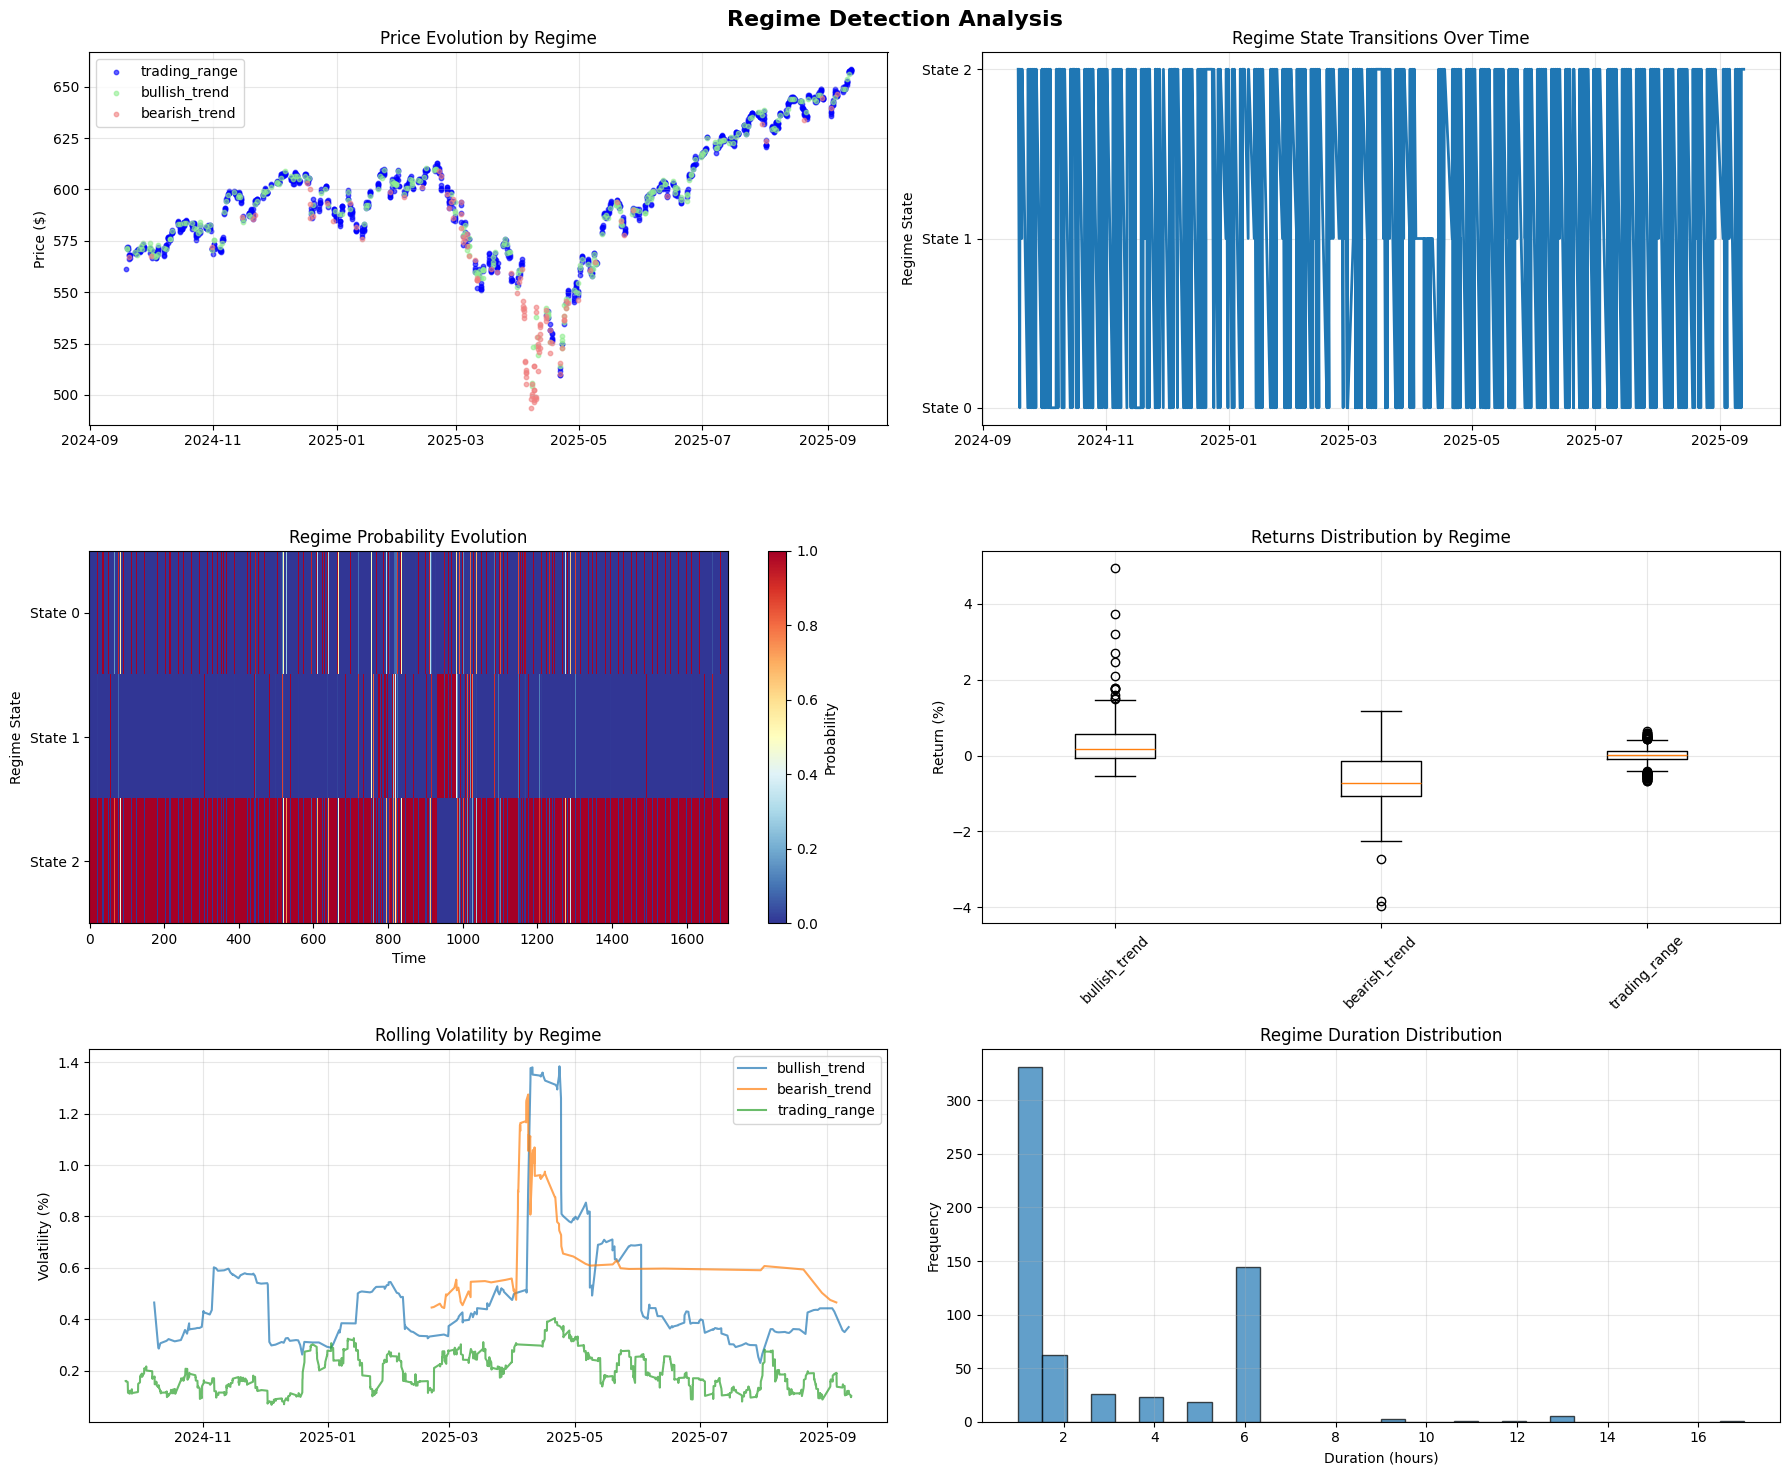

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Regime Detection Analysis', fontsize=16, fontweight='bold')

ax = axes[0, 0]
regime_colors = {'bullish_breakout': 'green', 'bearish_breakout': 'red', 'trading_range': 'blue',
                'bullish_trend': 'lightgreen', 'bearish_trend': 'lightcoral'}

price_regime_df = spy_prices_df.iloc[regime_start_idx:].copy()
price_regime_df['regime_label'] = regime_df['regime_label']

for label, color in regime_colors.items():
    mask = price_regime_df['regime_label'] == label
    if mask.any():
        ax.scatter(price_regime_df[mask].index, price_regime_df[mask]['close'],
                  c=color, label=label, alpha=0.6, s=10)

ax.set_title('Price Evolution by Regime')
ax.set_ylabel('Price ($)')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[0, 1]
ax.plot(regime_df.index, regime_df['regime_state'], linewidth=2)
ax.set_title('Regime State Transitions Over Time')
ax.set_ylabel('Regime State')
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['State 0', 'State 1', 'State 2'])
ax.grid(True, alpha=0.3)

ax = axes[1, 0]
prob_matrix = regime_df[['regime_prob_0', 'regime_prob_1', 'regime_prob_2']].values.T
im = ax.imshow(prob_matrix, aspect='auto', cmap='RdYlBu_r', interpolation='nearest')
ax.set_title('Regime Probability Evolution')
ax.set_ylabel('Regime State')
ax.set_xlabel('Time')
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['State 0', 'State 1', 'State 2'])
plt.colorbar(im, ax=ax, label='Probability')

ax = axes[1, 1]
returns_regime_df = spy_returns_df.iloc[regime_start_idx:].copy()
returns_regime_df['regime_label'] = regime_df['regime_label']

regime_returns = []
regime_names = []
for label in regime_labels.values():
    if label in returns_regime_df['regime_label'].values:
        regime_returns.append(returns_regime_df[returns_regime_df['regime_label'] == label]['close_return'].values)
        regime_names.append(label)

ax.boxplot(regime_returns, labels=regime_names)
ax.set_title('Returns Distribution by Regime')
ax.set_ylabel('Return (%)')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3)

ax = axes[2, 0]
for label in regime_labels.values():
    if label in returns_regime_df['regime_label'].values:
        regime_data = returns_regime_df[returns_regime_df['regime_label'] == label]
        rolling_vol = regime_data['close_return'].rolling(window=20).std()
        ax.plot(regime_data.index, rolling_vol, label=label, alpha=0.7)

ax.set_title('Rolling Volatility by Regime')
ax.set_ylabel('Volatility (%)')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[2, 1]
regime_changes = regime_df['regime_state'].diff().fillna(0) != 0
regime_durations = []
current_regime = regime_df['regime_state'].iloc[0]
duration = 1

for i in range(1, len(regime_df)):
    if regime_df['regime_state'].iloc[i] == current_regime:
        duration += 1
    else:
        regime_durations.append(duration)
        current_regime = regime_df['regime_state'].iloc[i]
        duration = 1
regime_durations.append(duration)

ax.hist(regime_durations, bins=30, alpha=0.7, edgecolor='black')
ax.set_title('Regime Duration Distribution')
ax.set_xlabel('Duration (hours)')
ax.set_ylabel('Frequency')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
for label in regime_labels.values():
    if label in returns_regime_df['regime_label'].values:
        regime_data = returns_regime_df[returns_regime_df['regime_label'] == label]

        if len(regime_data) > 0:
            print(f"\n{label.upper().replace('_', ' ')}:")
            print(f"  Observations: {len(regime_data)}")
            print(f"  Mean Return: {regime_data['close_return'].mean():.4f}%")
            print(f"  Std Deviation: {regime_data['close_return'].std():.4f}%")
            print(f"  Skewness: {regime_data['close_return'].skew():.4f}")
            print(f"  Win Rate: {(regime_data['close_return'] > 0).mean()*100:.1f}%")

            if len(regime_data) > 1:
                sharpe = (regime_data['close_return'].mean() / regime_data['close_return'].std()) * np.sqrt(252*24)
                print(f"  Sharpe Ratio: {sharpe:.4f}")

print(f"\nMean regime duration: {np.mean(regime_durations):.1f} hours")
print(f"Median regime duration: {np.median(regime_durations):.1f} hours")
print(f"Max regime duration: {np.max(regime_durations)} hours")


BULLISH TREND:
  Observations: 297
  Mean Return: 0.3191%
  Std Deviation: 0.6210%
  Skewness: 2.9823
  Win Rate: 67.3%
  Sharpe Ratio: 39.9588

BEARISH TREND:
  Observations: 120
  Mean Return: -0.6720%
  Std Deviation: 0.7994%
  Skewness: -1.0341
  Win Rate: 20.0%
  Sharpe Ratio: -65.3708

TRADING RANGE:
  Observations: 1293
  Mean Return: 0.0025%
  Std Deviation: 0.1943%
  Skewness: -0.2709
  Win Rate: 52.6%
  Sharpe Ratio: 1.0160

Mean regime duration: 2.8 hours
Median regime duration: 1.0 hours
Max regime duration: 17 hours


# Support and Resistance Detection

The system identifies key levels that bound the trading ranges and validates them with volume analysis.

In [26]:
from src.indicators.technical import PivotPointIndicator

In [27]:
pivot_detector = PivotPointIndicator(window=20, min_strength=2)

In [28]:
sr_data = pivot_detector.calculate(spy_prices_df)

print(f"Calculated pivot points for {len(sr_data)} price observations")
print(f"Pivot highs detected: {sr_data['pivot_high'].notna().sum()}")
print(f"Pivot lows detected: {sr_data['pivot_low'].notna().sum()}")

recent_data = sr_data.tail(10)
print(f"\nRecent Support/Resistance Levels:")
print(f"Dynamic Support: ${recent_data['dynamic_support'].iloc[-1]:.2f}")
print(f"Dynamic Resistance: ${recent_data['dynamic_resistance'].iloc[-1]:.2f}")
print(f"Range Width: {recent_data['range_width'].iloc[-1]:.1%}")
print(f"Current Range Position: {recent_data['range_position'].iloc[-1]:.1%}")

Calculated pivot points for 1731 price observations
Pivot highs detected: 79
Pivot lows detected: 89

Recent Support/Resistance Levels:
Dynamic Support: $644.61
Dynamic Resistance: $646.19
Range Width: 0.2%
Current Range Position: 100.0%


In [29]:
if len(regime_df) > 0:
    sr_regime_df = sr_data.iloc[regime_start_idx:].copy()
    sr_regime_df['regime_label'] = regime_df['regime_label']

    trading_range_periods = sr_regime_df[sr_regime_df['regime_label'] == 'trading_range']

    print(f"Trading Range Analysis:")
    print(f"Trading range periods: {len(trading_range_periods)} observations")

    if len(trading_range_periods) > 0:
        print(f"Average range width in trading ranges: {trading_range_periods['range_width'].mean():.1%}")
        print(f"Average range position distribution: {trading_range_periods['range_position'].mean():.1%}")

        range_quality = pivot_detector.get_range_quality(spy_prices_df.iloc[regime_start_idx:])
        trading_range_quality = range_quality[sr_regime_df['regime_label'] == 'trading_range']

        print(f"Average range quality score: {trading_range_quality.mean():.3f}")
        print(f"High quality ranges (>0.7): {(trading_range_quality > 0.7).sum()} periods")
else:
    print("No regime data available for support/resistance validation")

Trading Range Analysis:
Trading range periods: 1294 observations
Average range width in trading ranges: 2.5%
Average range position distribution: 67.0%
Average range quality score: 0.750
High quality ranges (>0.7): 764 periods


In [30]:
def validate_sr_levels_with_volume(price_data, sr_data, volume_threshold_multiplier=1.5):

    validated_sr = sr_data.copy()

    volume_ma = price_data['volume'].rolling(window=20).mean()
    high_volume_threshold = volume_ma * volume_threshold_multiplier

    support_tests = []
    resistance_tests = []

    for i in range(20, len(price_data)):
        current_support = sr_data['dynamic_support'].iloc[i]
        current_resistance = sr_data['dynamic_resistance'].iloc[i]

        recent_data = price_data.iloc[i-5:i+1]
        support_distance = abs(recent_data['low'] - current_support) / current_support
        support_test = (support_distance < 0.01) & (recent_data['volume'] > high_volume_threshold.iloc[i-5:i+1])

        resistance_distance = abs(recent_data['high'] - current_resistance) / current_resistance
        resistance_test = (resistance_distance < 0.01) & (recent_data['volume'] > high_volume_threshold.iloc[i-5:i+1])

        support_tests.append(support_test.any())
        resistance_tests.append(resistance_test.any())

    validated_sr['support_volume_validated'] = [False] * 20 + support_tests
    validated_sr['resistance_volume_validated'] = [False] * 20 + resistance_tests

    validated_sr['sr_validation_score'] = (
        validated_sr['support_volume_validated'].astype(int) +
        validated_sr['resistance_volume_validated'].astype(int)
    ) / 2

    return validated_sr

print("Validating support/resistance levels with volume analysis...")
validated_sr_data = validate_sr_levels_with_volume(spy_prices_df, sr_data)

support_validated = validated_sr_data['support_volume_validated'].sum()
resistance_validated = validated_sr_data['resistance_volume_validated'].sum()
total_observations = len(validated_sr_data) - 20

print(f"Volume validation results:")
print(f"Support levels validated by volume: {support_validated}/{total_observations} ({support_validated/total_observations*100:.1f}%)")
print(f"Resistance levels validated by volume: {resistance_validated}/{total_observations} ({resistance_validated/total_observations*100:.1f}%)")
print(f"Average validation score: {validated_sr_data['sr_validation_score'].mean():.3f}")

Validating support/resistance levels with volume analysis...
Volume validation results:
Support levels validated by volume: 483/1711 (28.2%)
Resistance levels validated by volume: 611/1711 (35.7%)
Average validation score: 0.316


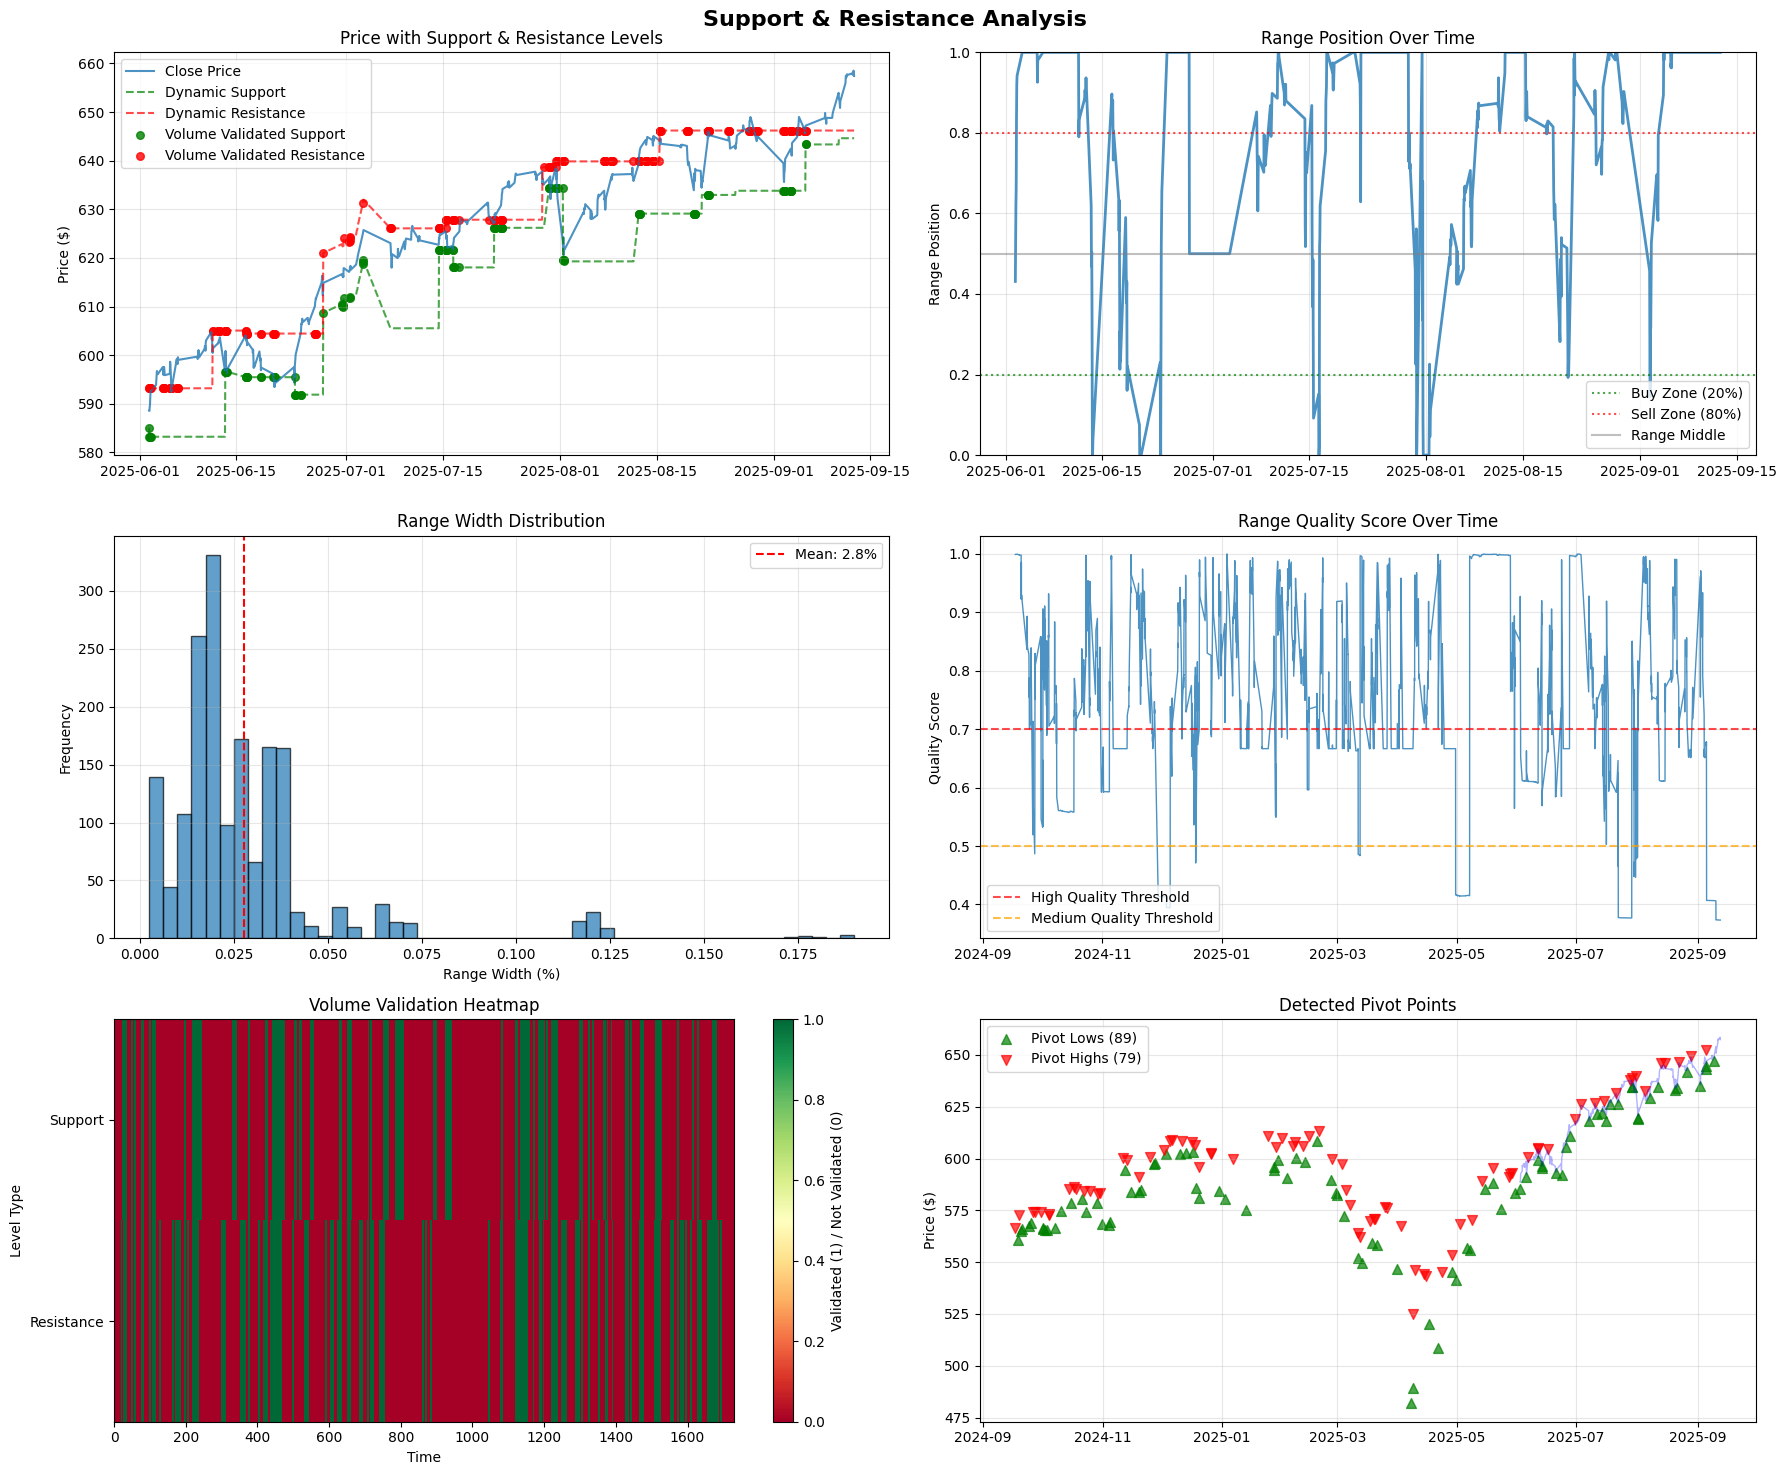

In [31]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Support & Resistance Analysis', fontsize=16, fontweight='bold')

ax = axes[0, 0]
recent_periods = 500
recent_sr_data = validated_sr_data.tail(recent_periods)
recent_price_data = spy_prices_df.tail(recent_periods)

ax.plot(recent_price_data.index, recent_price_data['close'], label='Close Price', linewidth=1.5, alpha=0.8)
ax.plot(recent_sr_data.index, recent_sr_data['dynamic_support'], label='Dynamic Support',
        color='green', linestyle='--', alpha=0.7)
ax.plot(recent_sr_data.index, recent_sr_data['dynamic_resistance'], label='Dynamic Resistance',
        color='red', linestyle='--', alpha=0.7)

support_validated_mask = recent_sr_data['support_volume_validated']
resistance_validated_mask = recent_sr_data['resistance_volume_validated']

ax.scatter(recent_sr_data[support_validated_mask].index,
          recent_sr_data[support_validated_mask]['dynamic_support'],
          color='green', marker='o', s=30, alpha=0.8, label='Volume Validated Support')
ax.scatter(recent_sr_data[resistance_validated_mask].index,
          recent_sr_data[resistance_validated_mask]['dynamic_resistance'],
          color='red', marker='o', s=30, alpha=0.8, label='Volume Validated Resistance')

ax.set_title('Price with Support & Resistance Levels')
ax.set_ylabel('Price ($)')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[0, 1]
ax.plot(recent_sr_data.index, recent_sr_data['range_position'], linewidth=2, alpha=0.8)
ax.axhline(y=0.2, color='green', linestyle=':', alpha=0.7, label='Buy Zone (20%)')
ax.axhline(y=0.8, color='red', linestyle=':', alpha=0.7, label='Sell Zone (80%)')
ax.axhline(y=0.5, color='gray', linestyle='-', alpha=0.5, label='Range Middle')
ax.set_title('Range Position Over Time')
ax.set_ylabel('Range Position')
ax.set_ylim(0, 1)
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1, 0]
ax.hist(validated_sr_data['range_width'].dropna(), bins=50, alpha=0.7, edgecolor='black')
ax.axvline(validated_sr_data['range_width'].mean(), color='red', linestyle='--',
          label=f'Mean: {validated_sr_data["range_width"].mean():.1%}')
ax.set_title('Range Width Distribution')
ax.set_xlabel('Range Width (%)')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1, 1]
range_quality_all = pivot_detector.get_range_quality(spy_prices_df)
ax.plot(range_quality_all.index, range_quality_all, alpha=0.8, linewidth=1)
ax.axhline(y=0.7, color='red', linestyle='--', alpha=0.7, label='High Quality Threshold')
ax.axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='Medium Quality Threshold')
ax.set_title('Range Quality Score Over Time')
ax.set_ylabel('Quality Score')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[2, 0]
validation_matrix = np.column_stack([
    validated_sr_data['support_volume_validated'].astype(int),
    validated_sr_data['resistance_volume_validated'].astype(int)
]).T

im = ax.imshow(validation_matrix, aspect='auto', cmap='RdYlGn', interpolation='nearest')
ax.set_title('Volume Validation Heatmap')
ax.set_ylabel('Level Type')
ax.set_xlabel('Time')
ax.set_yticks([0, 1])
ax.set_yticklabels(['Support', 'Resistance'])
plt.colorbar(im, ax=ax, label='Validated (1) / Not Validated (0)')

ax = axes[2, 1]
pivot_highs = validated_sr_data['pivot_high'].dropna()
pivot_lows = validated_sr_data['pivot_low'].dropna()

ax.scatter(pivot_lows.index, pivot_lows.values, color='green', marker='^',
          s=50, alpha=0.7, label=f'Pivot Lows ({len(pivot_lows)})')
ax.scatter(pivot_highs.index, pivot_highs.values, color='red', marker='v',
          s=50, alpha=0.7, label=f'Pivot Highs ({len(pivot_highs)})')

ax.plot(recent_price_data.index, recent_price_data['close'],
       color='blue', alpha=0.3, linewidth=1)

ax.set_title('Detected Pivot Points')
ax.set_ylabel('Price ($)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [32]:
if len(regime_df) > 0 and 'trading_range' in regime_df['regime_label'].values:

    sr_regime_aligned = validated_sr_data.iloc[regime_start_idx:].copy()
    sr_regime_aligned['regime_label'] = regime_df['regime_label']

    trading_range_sr = sr_regime_aligned[sr_regime_aligned['regime_label'] == 'trading_range']

    print(f"Trading Range Regime Analysis:")
    print(f"Total trading range periods: {len(trading_range_sr)}")

    if len(trading_range_sr) > 0:
        print("Support & Resistance Characteristics in Trading Ranges:")
        print(f"Average range width: {trading_range_sr['range_width'].mean():.2%}")
        print(f"Median range width: {trading_range_sr['range_width'].median():.2%}")
        print(f"Range width std dev: {trading_range_sr['range_width'].std():.2%}")

        print("Range Position Distribution:")
        position_stats = trading_range_sr['range_position'].describe()
        for stat, value in position_stats.items():
            print(f"  {stat}: {value:.3f}")

        print("Volume Validation in Trading Ranges:")
        tr_support_validated = trading_range_sr['support_volume_validated'].sum()
        tr_resistance_validated = trading_range_sr['resistance_volume_validated'].sum()
        print(f"Support validations: {tr_support_validated}/{len(trading_range_sr)} ({tr_support_validated/len(trading_range_sr)*100:.1f}%)")
        print(f"Resistance validations: {tr_resistance_validated}/{len(trading_range_sr)} ({tr_resistance_validated/len(trading_range_sr)*100:.1f}%)")

        tr_range_quality = pivot_detector.get_range_quality(spy_prices_df.iloc[regime_start_idx:])
        tr_quality_in_ranges = tr_range_quality[sr_regime_aligned['regime_label'] == 'trading_range']

        print("Range Quality in Trading Ranges:")
        print(f"Average quality score: {tr_quality_in_ranges.mean():.3f}")
        print(f"High quality periods (>0.7): {(tr_quality_in_ranges > 0.7).sum()}/{len(tr_quality_in_ranges)} ({(tr_quality_in_ranges > 0.7).sum()/len(tr_quality_in_ranges)*100:.1f}%)")

        high_quality_ranges = trading_range_sr[
            (tr_quality_in_ranges > 0.7) &
            (trading_range_sr['range_width'] > 0.02) &
            ((trading_range_sr['support_volume_validated']) | (trading_range_sr['resistance_volume_validated']))
        ]

        print("High-Quality Trading Opportunities:")
        print(f"Periods meeting all criteria: {len(high_quality_ranges)}")
        if len(high_quality_ranges) > 0:
            print(f"Average range width in best opportunities: {high_quality_ranges['range_width'].mean():.2%}")
            print(f"Average validation score: {high_quality_ranges['sr_validation_score'].mean():.3f}")

else:
    print("No trading range regime periods detected for analysis")

Trading Range Regime Analysis:
Total trading range periods: 1294
Support & Resistance Characteristics in Trading Ranges:
Average range width: 2.47%
Median range width: 2.05%
Range width std dev: 1.66%
Range Position Distribution:
  count: 1294.000
  mean: 0.670
  std: 0.313
  min: 0.000
  25%: 0.500
  50%: 0.720
  75%: 1.000
  max: 1.000
Volume Validation in Trading Ranges:
Support validations: 370/1294 (28.6%)
Resistance validations: 471/1294 (36.4%)
Range Quality in Trading Ranges:
Average quality score: 0.750
High quality periods (>0.7): 764/1294 (59.0%)
High-Quality Trading Opportunities:
Periods meeting all criteria: 258
Average range width in best opportunities: 3.12%
Average validation score: 0.583


In [33]:
final_sr_dataset = validated_sr_data.copy()

if len(regime_df) > 0:
    regime_aligned = pd.DataFrame(index=final_sr_dataset.index)
    regime_aligned.loc[regime_df.index, 'regime_label'] = regime_df['regime_label']
    regime_aligned.loc[regime_df.index, 'regime_state'] = regime_df['regime_state']
    regime_aligned = regime_aligned.fillna('unknown')

    final_sr_dataset['regime_label'] = regime_aligned['regime_label']
    final_sr_dataset['regime_state'] = regime_aligned['regime_state']

trading_signals = pivot_detector.get_signals(spy_prices_df)
final_sr_dataset['pivot_signals'] = trading_signals

breakout_signals = pivot_detector.identify_breakouts(spy_prices_df, breakout_threshold=0.015)
final_sr_dataset['upside_breakout'] = breakout_signals['upside_breakout']
final_sr_dataset['downside_breakout'] = breakout_signals['downside_breakout']

print("Final Support/Resistance Dataset:")
print(f"Total observations: {len(final_sr_dataset)}")
print(f"Columns: {len(final_sr_dataset.columns)}")

recent_final = final_sr_dataset.tail(100)
print("Recent Performance (Last 100 periods):")
print(f"Trading signals generated: {(recent_final['pivot_signals'] != 0).sum()}")
print(f"Upside breakouts detected: {recent_final['upside_breakout'].sum()}")
print(f"Downside breakouts detected: {recent_final['downside_breakout'].sum()}")
print(f"Average range quality: {pivot_detector.get_range_quality(spy_prices_df).tail(100).mean():.3f}")

Final Support/Resistance Dataset:
Total observations: 1731
Columns: 27
Recent Performance (Last 100 periods):
Trading signals generated: 88
Upside breakouts detected: 2
Downside breakouts detected: 0
Average range quality: 0.614


# Breakout Probability Prediction

In [34]:
from src.indicators.breakout_probability import CatBoostBreakoutPredictor
from sklearn.metrics import classification_report

In [35]:
breakout_predictor = CatBoostBreakoutPredictor(
    breakout_threshold=0.02,
    lookforward_periods=24,
)

In [36]:
spy_prices_df

,open,high,low,close,volume,dividends,stock splits,capital gains
Datetime,,,,,,,,
2024-09-16 09:30:00-04:00,561.750000,562.919983,560.859985,561.478821,6951743,0.0,0.0,0.0
2024-09-16 10:30:00-04:00,560.909973,561.539978,559.900024,560.830017,5125936,0.0,0.0,0.0
2024-09-16 11:30:00-04:00,560.820007,561.419983,560.340027,561.389893,3354915,0.0,0.0,0.0
2024-09-16 12:30:00-04:00,561.380005,561.909973,560.789978,561.715027,3311704,0.0,0.0,0.0
2024-09-16 13:30:00-04:00,561.710022,562.599976,561.609985,562.549988,3520039,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-09-12 11:30:00-04:00,657.640015,658.059998,657.210022,658.049988,5222339,0.0,0.0,0.0
2025-09-12 12:30:00-04:00,658.049988,658.280029,657.650024,658.099976,4933029,0.0,0.0,0.0
2025-09-12 13:30:00-04:00,658.099976,658.565002,657.900024,658.505005,5524799,0.0,0.0,0.0


In [37]:
training_results = breakout_predictor.fit(
    data=spy_prices_df,
    support_resistance_data=final_sr_dataset,
    test_size=0.2,
    validate_model=True
)

In [38]:
print("MODEL TRAINING RESULTS:")
print(f"Total samples: {training_results['training_stats']['total_samples']}")
print(f"Training samples: {training_results['training_stats']['training_samples']}")
print(f"Test samples: {training_results['training_stats']['test_samples']}")
print(f"Features used: {training_results['training_stats']['feature_count']}")
print(f"Upward breakout rate: {training_results['training_stats']['upward_breakout_rate']:.3%}")
print(f"Downward breakout rate: {training_results['training_stats']['downward_breakout_rate']:.3%}")

print("\n🔺 UPWARD BREAKOUT MODEL PERFORMANCE:")
up_metrics = training_results['upward_model']['classification_report']['macro avg']
print(f"Precision: {up_metrics['precision']:.3f}")
print(f"Recall: {up_metrics['recall']:.3f}")
print(f"F1-Score: {up_metrics['f1-score']:.3f}")
print(f"ROC AUC: {training_results['upward_model']['roc_auc']:.3f}")

print("\n🔻 DOWNWARD BREAKOUT MODEL PERFORMANCE:")
down_metrics = training_results['downward_model']['classification_report']['macro avg']
print(f"Precision: {down_metrics['precision']:.3f}")
print(f"Recall: {down_metrics['recall']:.3f}")
print(f"F1-Score: {down_metrics['f1-score']:.3f}")
print(f"ROC AUC: {training_results['downward_model']['roc_auc']:.3f}")

breakout_predictions = breakout_predictor.predict_breakout_probability(
    data=spy_prices_df,
    support_resistance_data=final_sr_dataset
)

prediction_df = pd.DataFrame(breakout_predictions, index=spy_prices_df.index)
prediction_df['close'] = spy_prices_df['close']
prediction_df['range_position'] = final_sr_dataset['range_position']


MODEL TRAINING RESULTS:
Total samples: 1731
Training samples: 1384
Test samples: 347
Features used: 43
Upward breakout rate: 16.984%
Downward breakout rate: 22.241%

🔺 UPWARD BREAKOUT MODEL PERFORMANCE:
Precision: 0.936
Recall: 0.842
F1-Score: 0.880
ROC AUC: 0.963

🔻 DOWNWARD BREAKOUT MODEL PERFORMANCE:
Precision: 0.917
Recall: 0.857
F1-Score: 0.882
ROC AUC: 0.976


In [39]:
print("\n📈 BREAKOUT PROBABILITY ANALYSIS:")
print(f"Average upward breakout probability: {prediction_df['upward_probability'].mean():.3%}")
print(f"Average downward breakout probability: {prediction_df['downward_probability'].mean():.3%}")
print(f"Average total breakout probability: {prediction_df['total_breakout_probability'].mean():.3%}")
print(f"Average directional bias: {prediction_df['directional_bias'].mean():.3f}")

high_breakout_threshold = 0.7
high_breakout_periods = prediction_df[prediction_df['total_breakout_probability'] > high_breakout_threshold]
print(f"\nHigh breakout probability periods (>{high_breakout_threshold:.0%}): {len(high_breakout_periods)}")

if len(high_breakout_periods) > 0:
    print(f"Average upward bias during high breakout periods: {high_breakout_periods['directional_bias'].mean():.3f}")



📈 BREAKOUT PROBABILITY ANALYSIS:
Average upward breakout probability: 16.170%
Average downward breakout probability: 21.631%
Average total breakout probability: 35.060%
Average directional bias: -0.223

High breakout probability periods (>70%): 594
Average upward bias during high breakout periods: -0.151


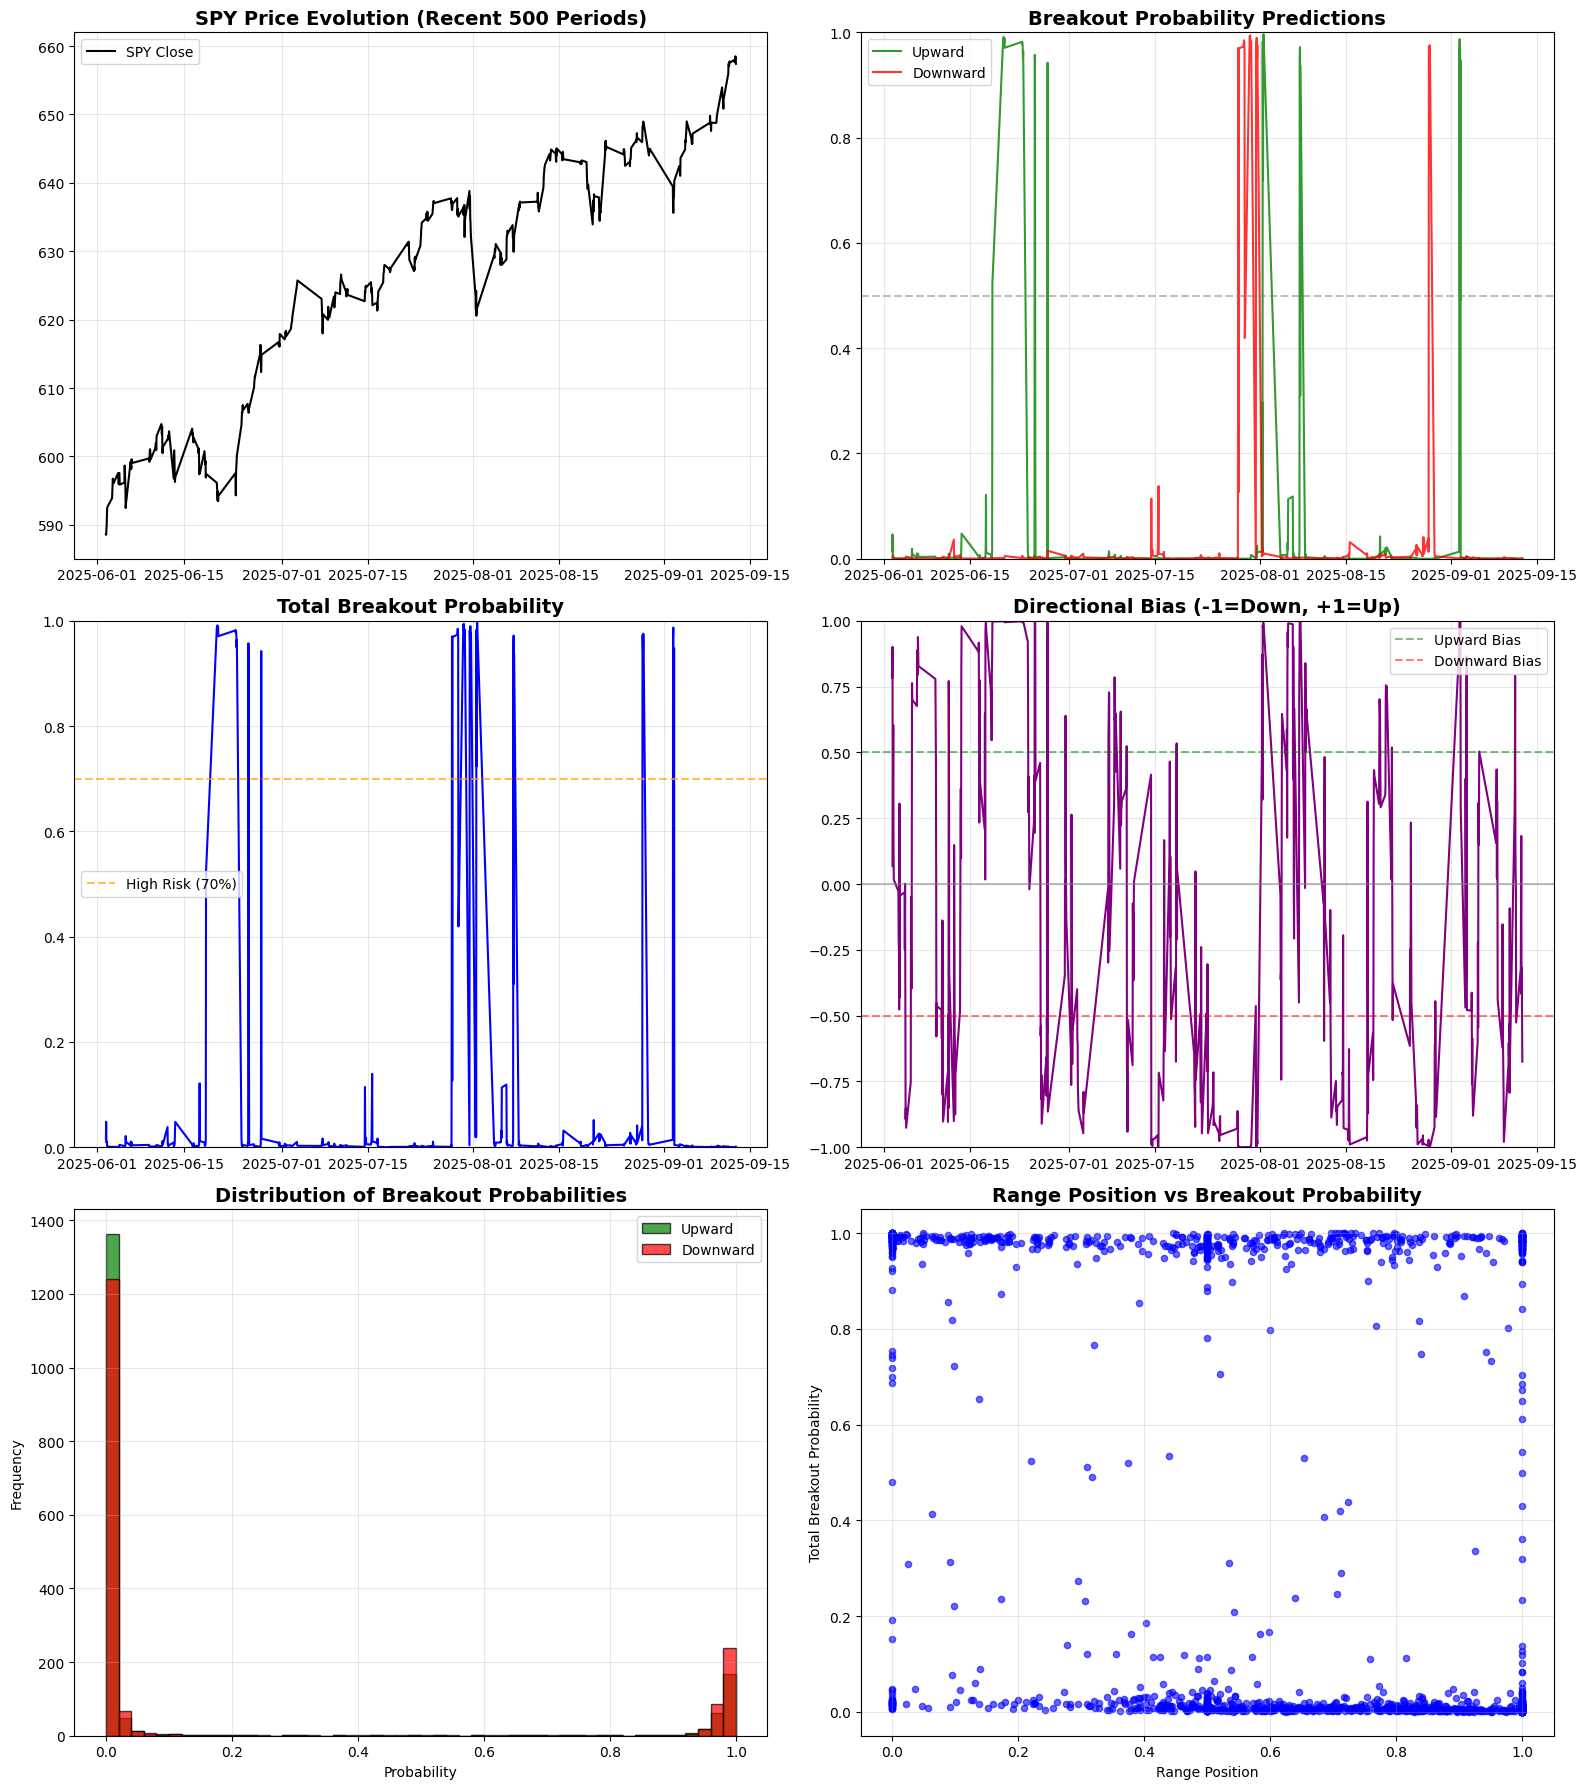

In [40]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

recent_data = prediction_df.tail(500)

axes[0, 0].plot(recent_data.index, recent_data['close'], 'k-', linewidth=1.5, label='SPY Close')
axes[0, 0].set_title('SPY Price Evolution (Recent 500 Periods)', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(recent_data.index, recent_data['upward_probability'], 'g-', alpha=0.8, label='Upward')
axes[0, 1].plot(recent_data.index, recent_data['downward_probability'], 'r-', alpha=0.8, label='Downward')
axes[0, 1].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Breakout Probability Predictions', fontsize=14, fontweight='bold')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(recent_data.index, recent_data['total_breakout_probability'], 'b-', linewidth=1.5)
axes[1, 0].axhline(y=high_breakout_threshold, color='orange', linestyle='--', alpha=0.7, label=f'High Risk ({high_breakout_threshold:.0%})')
axes[1, 0].set_title('Total Breakout Probability', fontsize=14, fontweight='bold')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(recent_data.index, recent_data['directional_bias'], 'purple', linewidth=1.5)
axes[1, 1].axhline(y=0, color='gray', linestyle='-', alpha=0.5)
axes[1, 1].axhline(y=0.5, color='green', linestyle='--', alpha=0.5, label='Upward Bias')
axes[1, 1].axhline(y=-0.5, color='red', linestyle='--', alpha=0.5, label='Downward Bias')
axes[1, 1].set_title('Directional Bias (-1=Down, +1=Up)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylim(-1, 1)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

axes[2, 0].hist(prediction_df['upward_probability'], bins=50, alpha=0.7, color='green', edgecolor='black', label='Upward')
axes[2, 0].hist(prediction_df['downward_probability'], bins=50, alpha=0.7, color='red', edgecolor='black', label='Downward')
axes[2, 0].set_title('Distribution of Breakout Probabilities', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('Probability')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

scatter_x = prediction_df['range_position'].dropna()
scatter_y = prediction_df['total_breakout_probability'][scatter_x.index]
axes[2, 1].scatter(scatter_x, scatter_y, alpha=0.6, s=20, c='blue')
axes[2, 1].set_xlabel('Range Position')
axes[2, 1].set_ylabel('Total Breakout Probability')
axes[2, 1].set_title('Range Position vs Breakout Probability', fontsize=14, fontweight='bold')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

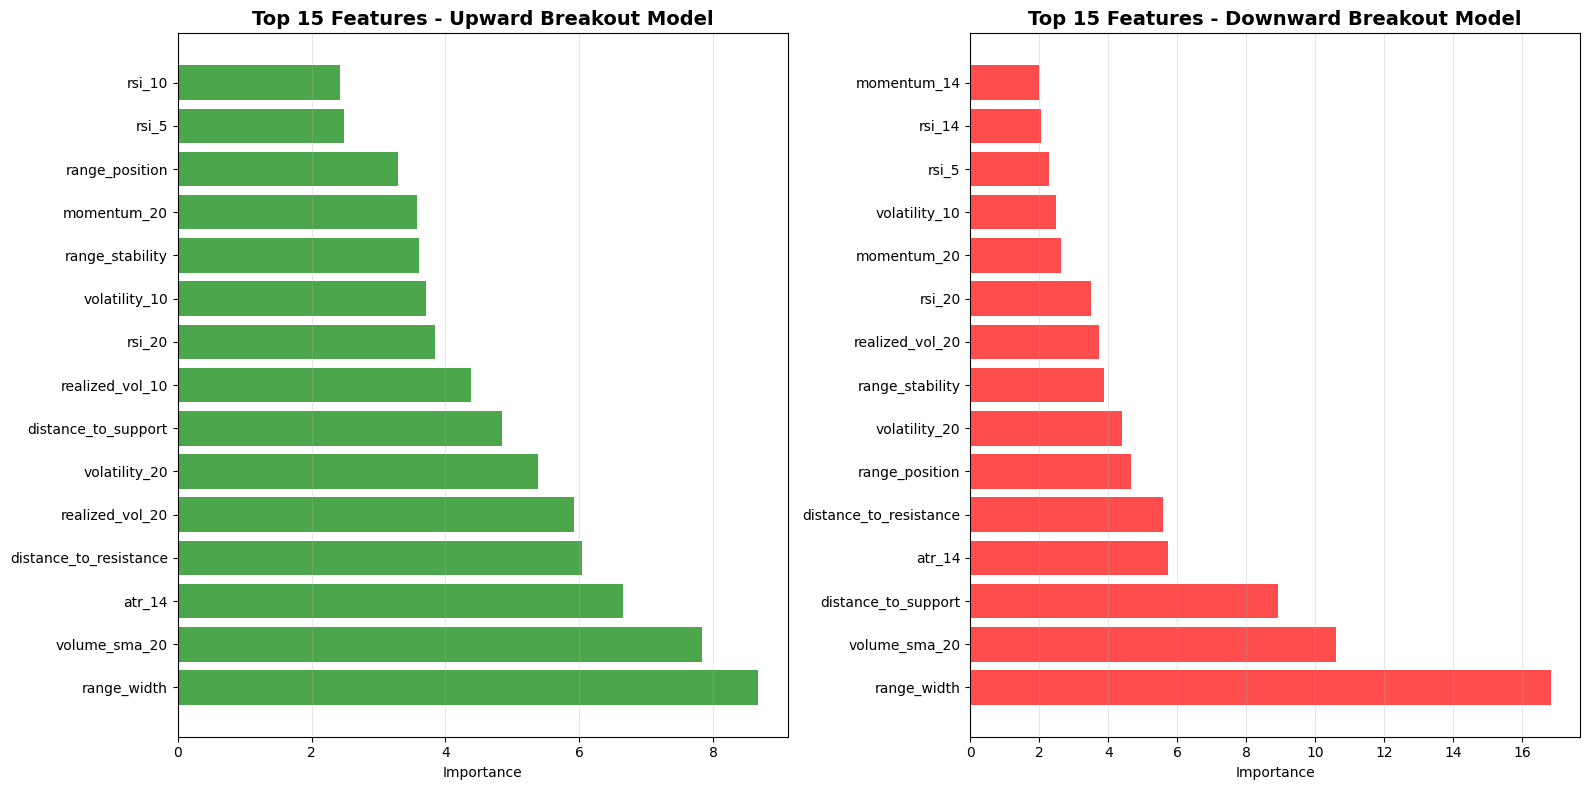

TOP 10 FEATURES FOR UPWARD BREAKOUTS:
 1. range_width: 8.6789
 2. volume_sma_20: 7.8311
 3. atr_14: 6.6543
 4. distance_to_resistance: 6.0435
 5. realized_vol_20: 5.9265
 6. volatility_20: 5.3911
 7. distance_to_support: 4.8475
 8. realized_vol_10: 4.3769
 9. rsi_20: 3.8448
10. volatility_10: 3.7083

TOP 10 FEATURES FOR DOWNWARD BREAKOUTS:
 1. range_width: 16.8301
 2. volume_sma_20: 10.6067
 3. distance_to_support: 8.9138
 4. atr_14: 5.7260
 5. distance_to_resistance: 5.5888
 6. range_position: 4.6572
 7. volatility_20: 4.4054
 8. range_stability: 3.8860
 9. realized_vol_20: 3.7414
10. rsi_20: 3.4889


In [41]:
feature_importance = breakout_predictor.get_feature_importance()

upward_importance = pd.Series(feature_importance['upward_model']).sort_values(ascending=False)
downward_importance = pd.Series(feature_importance['downward_model']).sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

top_features_up = upward_importance.head(15)
ax1.barh(range(len(top_features_up)), top_features_up.values, color='green', alpha=0.7)
ax1.set_yticks(range(len(top_features_up)))
ax1.set_yticklabels(top_features_up.index, fontsize=10)
ax1.set_xlabel('Importance')
ax1.set_title('Top 15 Features - Upward Breakout Model', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

top_features_down = downward_importance.head(15)
ax2.barh(range(len(top_features_down)), top_features_down.values, color='red', alpha=0.7)
ax2.set_yticks(range(len(top_features_down)))
ax2.set_yticklabels(top_features_down.index, fontsize=10)
ax2.set_xlabel('Importance')
ax2.set_title('Top 15 Features - Downward Breakout Model', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("TOP 10 FEATURES FOR UPWARD BREAKOUTS:")
for i, (feature, importance) in enumerate(upward_importance.head(10).items(), 1):
    print(f"{i:2d}. {feature}: {importance:.4f}")

print()
print("TOP 10 FEATURES FOR DOWNWARD BREAKOUTS:")
for i, (feature, importance) in enumerate(downward_importance.head(10).items(), 1):
    print(f"{i:2d}. {feature}: {importance:.4f}")


In [42]:
combined_predictions = pd.DataFrame({
    'close': spy_prices_df['close'],
    'range_position': final_sr_dataset['range_position'],
    'range_top': final_sr_dataset['range_top'],
    'range_bottom': final_sr_dataset['range_bottom'],
    'upward_probability': prediction_df['upward_probability'],
    'downward_probability': prediction_df['downward_probability'],
    'total_breakout_probability': prediction_df['total_breakout_probability'],
    'directional_bias': prediction_df['directional_bias'],
    'pivot_signals': final_sr_dataset['pivot_signals']
})

risk_adjusted_positions = pd.Series(0, index=combined_predictions.index)

for i in range(len(combined_predictions)):
    current_signal = combined_predictions['pivot_signals'].iloc[i]
    breakout_prob = combined_predictions['total_breakout_probability'].iloc[i]
    range_pos = combined_predictions['range_position'].iloc[i]

    risk_multiplier = 1 - breakout_prob

    if current_signal == 1 and breakout_prob < 0.6:
        if range_pos <= 0.3:
            risk_adjusted_positions.iloc[i] = risk_multiplier * 1.0
    elif current_signal == -1 and breakout_prob < 0.6:
        if range_pos >= 0.7:
            risk_adjusted_positions.iloc[i] = risk_multiplier * -1.0
    elif current_signal in [2, -2]:
        risk_adjusted_positions.iloc[i] = 0

combined_predictions['risk_adjusted_position'] = risk_adjusted_positions

print(f"Original pivot signals: {(final_sr_dataset['pivot_signals'] != 0).sum()}")
print(f"Risk-adjusted signals: {(risk_adjusted_positions != 0).sum()}")

signal_reduction = 1 - (risk_adjusted_positions != 0).sum() / (final_sr_dataset['pivot_signals'] != 0).sum()
print(f"Signal reduction due to breakout risk: {signal_reduction:.1%}")

recent_combined = combined_predictions.tail(100)
print(f"\nRecent period analysis (last 100):")
print(f"High breakout risk periods (>60%): {(recent_combined['total_breakout_probability'] > 0.6).sum()}")
print(f"Average breakout probability: {recent_combined['total_breakout_probability'].mean():.1%}")
print(f"Risk-adjusted position changes: {(recent_combined['risk_adjusted_position'] != 0).sum()}")

print(f"Dataset shape: {combined_predictions.shape}")

Original pivot signals: 1145
Risk-adjusted signals: 0
Signal reduction due to breakout risk: 100.0%

Recent period analysis (last 100):
High breakout risk periods (>60%): 8
Average breakout probability: 9.2%
Risk-adjusted position changes: 0
Dataset shape: (1731, 10)


# Strategy implementation

In [43]:
from src.strategy.range_trading_strategy import RangeTradingStrategy
from src.strategy.signal_generator import RangeTradingSignalGenerator
from config.settings import StrategyConfig

In [44]:
strategy_config = StrategyConfig(
    max_breakout_probability=0.7,
    min_range_width=0.01,
    range_entry_buffer=0.2,
    range_exit_buffer=0.8,
    min_range_quality=0.3,
    base_position_size=1.0
)

range_strategy = RangeTradingStrategy(strategy_config)
training_results = range_strategy.fit_models(spy_prices_df, final_sr_dataset)

In [45]:
range_strategy.update_model_predictions(spy_prices_df, final_sr_dataset)

signal_generator = RangeTradingSignalGenerator(
    strategy=range_strategy,
    buy_threshold=0.3,
    sell_threshold=-0.3
)

trading_signals = signal_generator.generate_entry_signals(spy_prices_df)

signal_filters = {
    'allowed_hours': [9, 10, 11, 12, 13, 14, 15],
    'min_signal_gap': 2,
    'max_daily_signals': 5,
    'max_volatility': 0.05
}

filtered_signals = signal_generator.filter_signals(trading_signals, signal_filters)

In [46]:
signal_stats = signal_generator.get_signal_statistics(filtered_signals)

for key, value in signal_stats.items():
    if isinstance(value, float):
        print(f"{key}: {value:.3f}")
    else:
        print(f"{key}: {value}")

recent_signals = filtered_signals.tail(100)
print(f"\nRecent signals (last 100 periods):")
print(f"Buy signals: {(recent_signals == 'buy').sum()}")
print(f"Sell signals: {(recent_signals == 'sell').sum()}")
print(f"Neutral periods: {(recent_signals == 'neutral').sum()}")

print(f"\nDEBUG: Strategy Score Analysis")
recent_periods_debug = 50
recent_price_debug = spy_prices_df.tail(recent_periods_debug)
recent_sr_debug = final_sr_dataset.tail(recent_periods_debug)

print(f"Recent S/R levels (last 5 periods):")
for i in range(-5, 0):
    idx = recent_sr_debug.index[i]
    support = recent_sr_debug['dynamic_support'].iloc[i]
    resistance = recent_sr_debug['dynamic_resistance'].iloc[i]
    range_width = recent_sr_debug['range_width'].iloc[i]
    range_pos = recent_sr_debug['range_position'].iloc[i]
    print(f"  {idx}: Support=${support:.2f}, Resistance=${resistance:.2f}, Width={range_width:.3f}, Position={range_pos:.3f}")

print(f"\nSample strategy scores (last 10 periods):")
for i in range(-10, 0):
    timestamp = recent_price_debug.index[i]
    score = range_strategy.calculate_strategy_score(timestamp)
    regime = range_strategy.current_regime_data.loc[timestamp, 'regime_label'] if timestamp in range_strategy.current_regime_data.index else 'unknown'
    print(f"  {timestamp}: Score={score:.3f}, Regime={regime}")

total_signals: 162
buy_signals: 13
sell_signals: 149
neutral_periods: 1569
signal_frequency: 0.094
avg_daily_signals: 2.282
max_daily_signals: 4
signal_days: 71

Recent signals (last 100 periods):
Buy signals: 0
Sell signals: 14
Neutral periods: 86

DEBUG: Strategy Score Analysis
Recent S/R levels (last 5 periods):
  2025-09-12 11:30:00-04:00: Support=$644.61, Resistance=$646.19, Width=0.002, Position=1.000
  2025-09-12 12:30:00-04:00: Support=$644.61, Resistance=$646.19, Width=0.002, Position=1.000
  2025-09-12 13:30:00-04:00: Support=$644.61, Resistance=$646.19, Width=0.002, Position=1.000
  2025-09-12 14:30:00-04:00: Support=$644.61, Resistance=$646.19, Width=0.002, Position=1.000
  2025-09-12 15:30:00-04:00: Support=$644.61, Resistance=$646.19, Width=0.002, Position=1.000

Sample strategy scores (last 10 periods):
  2025-09-11 13:30:00-04:00: Score=0.000, Regime=trading_range
  2025-09-11 14:30:00-04:00: Score=0.000, Regime=trading_range
  2025-09-11 15:30:00-04:00: Score=0.000, Re

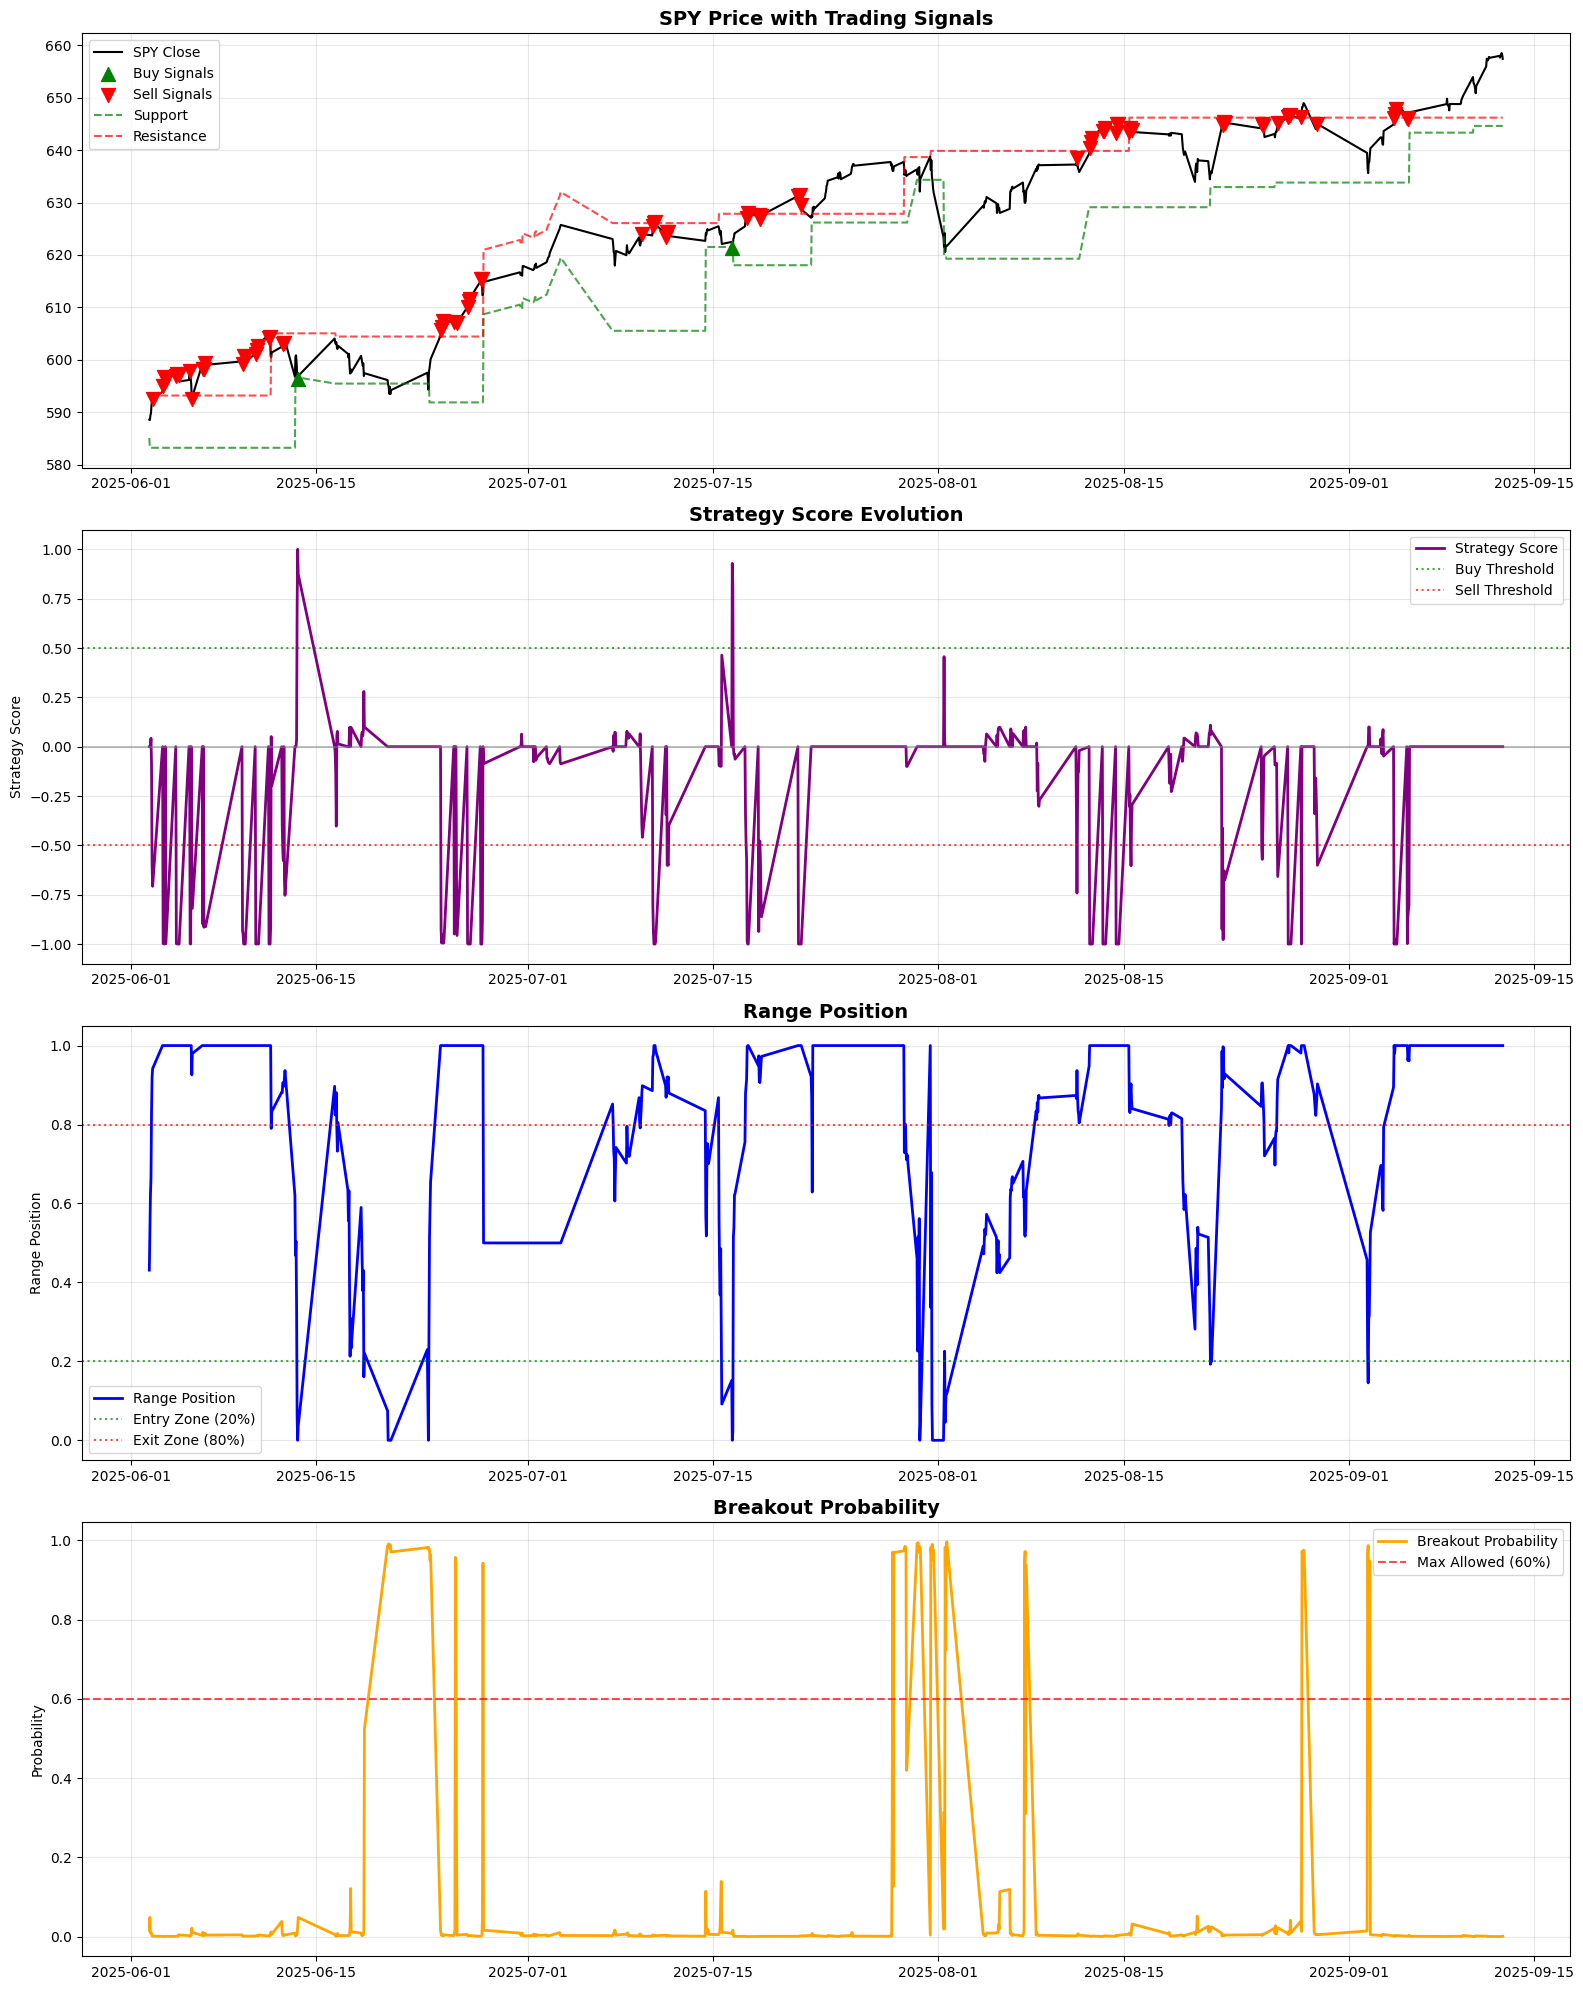

In [47]:
fig, axes = plt.subplots(4, 1, figsize=(16, 20))

recent_periods = 500
recent_price = spy_prices_df.tail(recent_periods)
recent_sr = final_sr_dataset.tail(recent_periods)
recent_signals_plot = filtered_signals.tail(recent_periods)
recent_predictions = prediction_df.tail(recent_periods)

ax = axes[0]
ax.plot(recent_price.index, recent_price['close'], 'k-', linewidth=1.5, label='SPY Close')

buy_mask = recent_signals_plot == 'buy'
sell_mask = recent_signals_plot == 'sell'

if buy_mask.any():
    ax.scatter(recent_signals_plot[buy_mask].index,
              recent_price.loc[recent_signals_plot[buy_mask].index, 'close'],
              color='green', marker='^', s=100, label='Buy Signals', zorder=5)

if sell_mask.any():
    ax.scatter(recent_signals_plot[sell_mask].index,
              recent_price.loc[recent_signals_plot[sell_mask].index, 'close'],
              color='red', marker='v', s=100, label='Sell Signals', zorder=5)

ax.plot(recent_sr.index, recent_sr['dynamic_support'], 'g--', alpha=0.7, label='Support')
ax.plot(recent_sr.index, recent_sr['dynamic_resistance'], 'r--', alpha=0.7, label='Resistance')
ax.set_title('SPY Price with Trading Signals', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1]
strategy_scores = pd.Series(0.0, index=recent_price.index)
for timestamp in recent_price.index:
    strategy_scores.loc[timestamp] = range_strategy.calculate_strategy_score(timestamp)

ax.plot(strategy_scores.index, strategy_scores, 'purple', linewidth=2, label='Strategy Score')
ax.axhline(y=0.5, color='green', linestyle=':', alpha=0.7, label='Buy Threshold')
ax.axhline(y=-0.5, color='red', linestyle=':', alpha=0.7, label='Sell Threshold')
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
ax.set_title('Strategy Score Evolution', fontsize=14, fontweight='bold')
ax.set_ylabel('Strategy Score')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[2]
ax.plot(recent_sr.index, recent_sr['range_position'], 'blue', linewidth=2, label='Range Position')
ax.axhline(y=0.2, color='green', linestyle=':', alpha=0.7, label='Entry Zone (20%)')
ax.axhline(y=0.8, color='red', linestyle=':', alpha=0.7, label='Exit Zone (80%)')
ax.set_title('Range Position', fontsize=14, fontweight='bold')
ax.set_ylabel('Range Position')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[3]
ax.plot(recent_predictions.index, recent_predictions['total_breakout_probability'],
        'orange', linewidth=2, label='Breakout Probability')
ax.axhline(y=0.6, color='red', linestyle='--', alpha=0.7, label='Max Allowed (60%)')
ax.set_title('Breakout Probability', fontsize=14, fontweight='bold')
ax.set_ylabel('Probability')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [48]:
def analyze_signal_performance(signals: pd.Series, prices: pd.DataFrame,
                              sr_data: pd.DataFrame, predictions: pd.DataFrame) -> Dict:
    performance_analysis = {
        'signal_timing': {},
        'range_analysis': {},
        'regime_alignment': {},
        'breakout_avoidance': {}
    }

    signal_times = signals[signals != 'neutral']

    if len(signal_times) > 0:
        signal_positions = []
        for timestamp in signal_times.index:
            if timestamp in sr_data.index:
                pos = sr_data.loc[timestamp, 'range_position']
                if not pd.isna(pos):
                    signal_positions.append(pos)

        performance_analysis['signal_timing'] = {
            'avg_range_position': np.mean(signal_positions) if signal_positions else 0,
            'signals_near_support': sum(1 for p in signal_positions if p <= 0.3),
            'signals_near_resistance': sum(1 for p in signal_positions if p >= 0.7),
            'signals_in_middle': sum(1 for p in signal_positions if 0.3 < p < 0.7)
        }

        signal_breakout_probs = []
        for timestamp in signal_times.index:
            if timestamp in predictions.index:
                prob = predictions.loc[timestamp, 'total_breakout_probability']
                if not pd.isna(prob):
                    signal_breakout_probs.append(prob)

        performance_analysis['breakout_avoidance'] = {
            'avg_breakout_prob': np.mean(signal_breakout_probs) if signal_breakout_probs else 0,
            'signals_low_breakout': sum(1 for p in signal_breakout_probs if p < 0.3),
            'signals_medium_breakout': sum(1 for p in signal_breakout_probs if 0.3 <= p < 0.6),
            'signals_high_breakout': sum(1 for p in signal_breakout_probs if p >= 0.6)
        }

    if len(range_strategy.current_regime_data) > 0:
        trading_range_periods = range_strategy.current_regime_data[
            range_strategy.current_regime_data['regime_label'] == 'trading_range'
        ]

        signals_in_trading_ranges = 0
        for timestamp in signal_times.index:
            if timestamp in trading_range_periods.index:
                signals_in_trading_ranges += 1

        performance_analysis['regime_alignment'] = {
            'total_trading_range_periods': len(trading_range_periods),
            'signals_in_trading_ranges': signals_in_trading_ranges,
            'regime_alignment_rate': signals_in_trading_ranges / len(signal_times) if len(signal_times) > 0 else 0
        }

    return performance_analysis

performance_results = analyze_signal_performance(
    filtered_signals, spy_prices_df, final_sr_dataset, prediction_df
)

print("\nSTRATEGY PERFORMANCE ANALYSIS:")
print("="*50)

for category, metrics in performance_results.items():
    print(f"\n{category.upper().replace('_', ' ')}:")
    for metric, value in metrics.items():
        if isinstance(value, float):
            print(f"  {metric}: {value:.3f}")
        else:
            print(f"  {metric}: {value}")


STRATEGY PERFORMANCE ANALYSIS:

SIGNAL TIMING:
  avg_range_position: 0.895
  signals_near_support: 13
  signals_near_resistance: 149
  signals_in_middle: 0

RANGE ANALYSIS:

REGIME ALIGNMENT:
  total_trading_range_periods: 1294
  signals_in_trading_ranges: 162
  regime_alignment_rate: 1.000

BREAKOUT AVOIDANCE:
  avg_breakout_prob: 0.019
  signals_low_breakout: 159
  signals_medium_breakout: 1
  signals_high_breakout: 2


In [49]:
print(f"Regime Detection: {len(range_strategy.current_regime_data)} regime predictions generated")
print(f"Support/Resistance: {len(final_sr_dataset)} S/R levels calculated")
print(f"Breakout Prediction: {len(prediction_df)} breakout probabilities generated")
print(f"Signal Generation: {len(filtered_signals)} total periods analyzed")

trading_range_coverage = (range_strategy.current_regime_data['regime_label'] == 'trading_range').sum()
print(f"Trading Range Coverage: {trading_range_coverage}/{len(range_strategy.current_regime_data)} periods ({trading_range_coverage/len(range_strategy.current_regime_data)*100:.1f}%)")

high_quality_ranges = (pivot_detector.get_range_quality(spy_prices_df) > 0.7).sum()
print(f"High Quality Ranges: {high_quality_ranges} periods identified")

low_breakout_periods = (prediction_df['total_breakout_probability'] < 0.6).sum()
print(f"Safe Trading Periods: {low_breakout_periods}/{len(prediction_df)} periods ({low_breakout_periods/len(prediction_df)*100:.1f}%)")

active_signals = len(filtered_signals[filtered_signals != 'neutral'])
print(f"Active Trading Signals: {active_signals} generated")

print(f"\nStrategy successfully combines:")
print(f"  - Regime detection (3-state HMM)")
print(f"  - Dynamic support/resistance detection")
print(f"  - Breakout probability prediction")
print(f"  - Risk-adjusted signal generation")
print(f"  - Multi-layer signal filtering")

Regime Detection: 1711 regime predictions generated
Support/Resistance: 1731 S/R levels calculated
Breakout Prediction: 1731 breakout probabilities generated
Signal Generation: 1731 total periods analyzed
Trading Range Coverage: 1294/1711 periods (75.6%)
High Quality Ranges: 1026 periods identified
Safe Trading Periods: 1130/1731 periods (65.3%)
Active Trading Signals: 162 generated

Strategy successfully combines:
  - Regime detection (3-state HMM)
  - Dynamic support/resistance detection
  - Breakout probability prediction
  - Risk-adjusted signal generation
  - Multi-layer signal filtering


# Strategy Parameters Optimization

In [50]:
from src.strategy.parameter_optimizer import RangeTradingOptimizer
from src.strategy.optimization_metrics import StrategyEvaluator
from src.backtesting.backtest_engine import BacktestEngine

In [51]:
optimization_split = int(0.8 * len(spy_prices_df))
train_data = spy_prices_df.iloc[:optimization_split].copy()
val_data = spy_prices_df.iloc[optimization_split:].copy()

print(f"Training data: {len(train_data)} periods ({train_data.index[0]} to {train_data.index[-1]})")
print(f"Validation data: {len(val_data)} periods ({val_data.index[0]} to {val_data.index[-1]})")

Training data: 1384 periods (2024-09-16 09:30:00-04:00 to 2025-07-02 14:30:00-04:00)
Validation data: 347 periods (2025-07-02 15:30:00-04:00 to 2025-09-12 15:30:00-04:00)


In [67]:
backtest_engine = BacktestEngine()

optimizer = RangeTradingOptimizer(
    data_config=data_config,
    backtest_engine=backtest_engine,
    optimization_metric='sharpe_ratio',  # Can be 'sharpe_ratio', 'calmar_ratio', 'total_return'
    n_trials=50,
    random_seed=13
)

In [68]:
optimization_result = optimizer.optimize(
    train_data=train_data,
    validation_data=val_data
)

print(f"Best {optimizer.optimization_metric}: {optimization_result.best_value:.4f}")

[I 2025-09-14 17:20:13,666] A new study created in memory with name: range_trading_optimization_sharpe_ratio


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-09-14 17:20:13,921] Trial 0 finished with value: -10.0 and parameters: {'max_breakout_probability': 0.68885120528691, 'min_range_width': 0.010938530500872807, 'range_entry_buffer': 0.2648557065322737, 'range_exit_buffer': 0.8931498396086, 'min_range_quality': 0.5863005569524466, 'base_position_size': 1.1801738711259682, 'pivot_window': 34, 'buy_threshold': 0.5102106058419387, 'sell_threshold': -0.34335466209637233, 'neutral_buffer': 0.1583027344275421}. Best is trial 0 with value: -10.0.
[I 2025-09-14 17:20:14,172] Trial 1 finished with value: -10.0 and parameters: {'max_breakout_probability': 0.31751826205071865, 'min_range_width': 0.012461236772229484, 'range_entry_buffer': 0.11170249837641495, 'range_exit_buffer': 0.8714121885174397, 'min_range_quality': 0.2864270139374038, 'base_position_size': 1.5197719273671455, 'pivot_window': 20, 'buy_threshold': 0.3390324860609968, 'sell_threshold': -0.5962348919676123, 'neutral_buffer': 0.10375006740574547}. Best is trial 0 with value

In [70]:
regime_params = {}
sr_params = {}
breakout_params = {}
strategy_params = {}
risk_params = {}
signal_params = {}

for param_name, param_value in optimization_result.best_params.items():
    if param_name.startswith('regime_'):
        regime_params[param_name] = param_value
    elif param_name.startswith('pivot_'):
        sr_params[param_name] = param_value
    elif param_name.startswith('catboost_'):
        breakout_params[param_name] = param_value
    elif param_name.startswith('max_position') or param_name.startswith('stop_') or param_name.startswith('take_') or param_name.startswith('max_daily_risk'):
        risk_params[param_name] = param_value
    elif param_name.startswith('buy_') or param_name.startswith('sell_') or param_name.startswith('signal_') or param_name.startswith('min_signal'):
        signal_params[param_name] = param_value
    else:
        strategy_params[param_name] = param_value

print("\n1. REGIME DETECTION PARAMETERS:")
for param, value in regime_params.items():
    print(f"   {param}: {value}")

print("\n2. SUPPORT/RESISTANCE PARAMETERS:")
for param, value in sr_params.items():
    print(f"   {param}: {value}")

print("\n3. BREAKOUT PREDICTION PARAMETERS:")
for param, value in breakout_params.items():
    print(f"   {param}: {value}")

print("\n4. STRATEGY PARAMETERS:")
for param, value in strategy_params.items():
    print(f"   {param}: {value}")

print("\n5. RISK MANAGEMENT PARAMETERS:")
for param, value in risk_params.items():
    print(f"   {param}: {value}")

print("\n6. SIGNAL GENERATION PARAMETERS:")
for param, value in signal_params.items():
    print(f"   {param}: {value}")


1. REGIME DETECTION PARAMETERS:

2. SUPPORT/RESISTANCE PARAMETERS:
   pivot_window: 34

3. BREAKOUT PREDICTION PARAMETERS:

4. STRATEGY PARAMETERS:
   max_breakout_probability: 0.68885120528691
   min_range_width: 0.010938530500872807
   range_entry_buffer: 0.2648557065322737
   range_exit_buffer: 0.8931498396086
   min_range_quality: 0.5863005569524466
   base_position_size: 1.1801738711259682
   neutral_buffer: 0.1583027344275421

5. RISK MANAGEMENT PARAMETERS:

6. SIGNAL GENERATION PARAMETERS:
   buy_threshold: 0.5102106058419387
   sell_threshold: -0.34335466209637233


In [71]:
optimized_strategy, optimized_signal_generator = optimizer.create_strategy(optimization_result.best_params)

print("Testing optimized strategy on validation data...")

# Test on validation data
validation_backtest = backtest_engine.run_backtest(
    strategy=optimized_strategy,
    signal_generator=optimized_signal_generator,
    data=val_data,
    initial_capital=100000
)

print(f"VALIDATION RESULTS:")
print(f"Total Return: {validation_backtest.metrics['total_return']:.2%}")
print(f"Sharpe Ratio: {validation_backtest.metrics['sharpe_ratio']:.3f}")
print(f"Max Drawdown: {validation_backtest.metrics['max_drawdown']:.2%}")
print(f"Number of Trades: {validation_backtest.metrics['total_trades']}")
print(f"Win Rate: {validation_backtest.metrics['win_rate']:.1%}")

Testing optimized strategy on validation data...
VALIDATION RESULTS:
Total Return: 0.00%
Sharpe Ratio: 0.000
Max Drawdown: 0.00%
Number of Trades: 0
Win Rate: 0.0%


In [72]:
baseline_strategy = RangeTradingStrategy(strategy_config)
baseline_strategy.fit_models(train_data, final_sr_dataset.iloc[:optimization_split])

baseline_signal_generator = RangeTradingSignalGenerator(
    strategy=baseline_strategy,
    buy_threshold=0.3,
    sell_threshold=-0.3
)

baseline_backtest = backtest_engine.run_backtest(
    strategy=baseline_strategy,
    signal_generator=baseline_signal_generator,
    data=val_data,
    initial_capital=100000
)

print("PERFORMANCE COMPARISON (Validation Data):")
print("=" * 50)
print(f"{'Metric':<20} {'Baseline':<15} {'Optimized':<15} {'Improvement':<15}")
print("-" * 65)

metrics_to_compare = ['total_return', 'sharpe_ratio', 'max_drawdown', 'win_rate', 'total_trades']

for metric in metrics_to_compare:
    baseline_val = baseline_backtest.metrics[metric]
    optimized_val = validation_backtest.metrics[metric]

    if metric == 'max_drawdown':
        improvement = (abs(baseline_val) - abs(optimized_val)) / abs(baseline_val) * 100
        improvement_str = f"{improvement:+.1f}%" if improvement != 0 else "0.0%"
        print(f"{metric:<20} {baseline_val:>13.2%} {optimized_val:>13.2%} {improvement_str:>13}")
    elif metric == 'total_trades':
        improvement = (optimized_val - baseline_val) / baseline_val * 100 if baseline_val != 0 else 0
        improvement_str = f"{improvement:+.1f}%" if improvement != 0 else "0.0%"
        print(f"{metric:<20} {baseline_val:>13.0f} {optimized_val:>13.0f} {improvement_str:>13}")
    elif metric == 'win_rate':
        improvement = (optimized_val - baseline_val) * 100
        improvement_str = f"{improvement:+.1f}pp" if improvement != 0 else "0.0pp"
        print(f"{metric:<20} {baseline_val:>13.1%} {optimized_val:>13.1%} {improvement_str:>13}")
    else:
        improvement = (optimized_val - baseline_val) / baseline_val * 100 if baseline_val != 0 else 0
        improvement_str = f"{improvement:+.1f}%" if improvement != 0 else "0.0%"
        if metric in ['total_return']:
            print(f"{metric:<20} {baseline_val:>13.2%} {optimized_val:>13.2%} {improvement_str:>13}")
        else:
            print(f"{metric:<20} {baseline_val:>13.3f} {optimized_val:>13.3f} {improvement_str:>13}")


PERFORMANCE COMPARISON (Validation Data):
Metric               Baseline        Optimized       Improvement    
-----------------------------------------------------------------
total_return                 0.00%         0.00%          0.0%
sharpe_ratio                 0.000         0.000          0.0%
max_drawdown                 0.00%         0.00%         +nan%
win_rate                      0.0%          0.0%         0.0pp
total_trades                     0             0          0.0%


In [73]:
try:
    param_importance = optimizer.get_feature_importance(optimization_result.study)

    if len(param_importance) > 0:
        print("\nPARAMETER IMPORTANCE ANALYSIS:")
        print("=" * 50)
        print(f"{'Parameter':<30} {'Importance':<15}")
        print("-" * 45)

        for _, row in param_importance.head(15).iterrows():
            print(f"{row['parameter']:<30} {row['importance']:<15.4f}")
    else:
        print("Parameter importance analysis not available")

except Exception as e:
    print(f"Could not analyze parameter importance: {e}")

Could not calculate parameter importance: Encountered zero total variance in all trees.


Parameter importance analysis not available


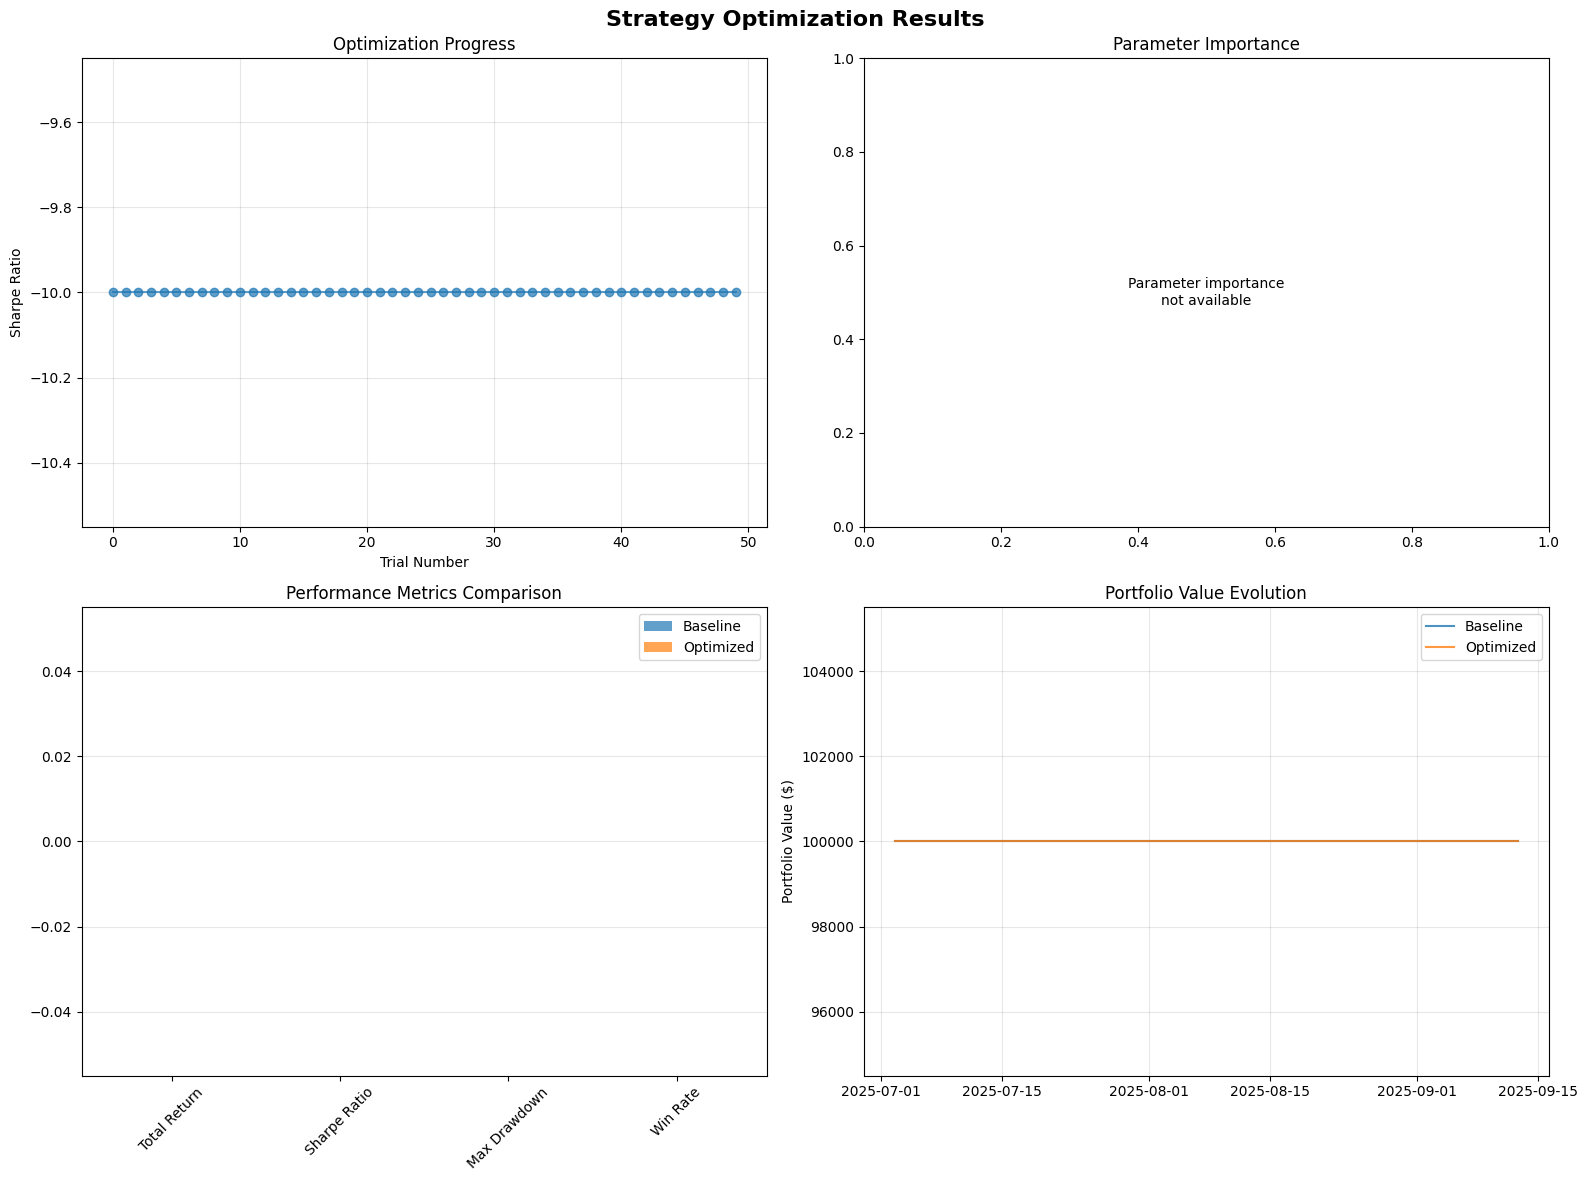

In [74]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Strategy Optimization Results', fontsize=16, fontweight='bold')

# Optimization history
trials_df = optimization_result.optimization_history
if not trials_df.empty:
    ax = axes[0, 0]
    ax.plot(trials_df['number'], trials_df['value'], 'o-', alpha=0.7)
    ax.set_title('Optimization Progress')
    ax.set_xlabel('Trial Number')
    ax.set_ylabel(f'{optimizer.optimization_metric.replace("_", " ").title()}')
    ax.grid(True, alpha=0.3)

# Parameter importance (if available)
ax = axes[0, 1]
try:
    if len(param_importance) > 0:
        top_params = param_importance.head(10)
        ax.barh(range(len(top_params)), top_params['importance'], alpha=0.7)
        ax.set_yticks(range(len(top_params)))
        ax.set_yticklabels(top_params['parameter'], fontsize=10)
        ax.set_title('Top 10 Parameter Importance')
        ax.set_xlabel('Importance Score')
        ax.grid(True, alpha=0.3, axis='x')
    else:
        ax.text(0.5, 0.5, 'Parameter importance\nnot available',
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title('Parameter Importance')
except:
    ax.text(0.5, 0.5, 'Parameter importance\nnot available',
            ha='center', va='center', transform=ax.transAxes)
    ax.set_title('Parameter Importance')

# Performance comparison
ax = axes[1, 0]
metrics = ['Total Return', 'Sharpe Ratio', 'Max Drawdown', 'Win Rate']
baseline_values = [baseline_backtest.metrics['total_return'],
                  baseline_backtest.metrics['sharpe_ratio'],
                  abs(baseline_backtest.metrics['max_drawdown']),
                  baseline_backtest.metrics['win_rate']]
optimized_values = [validation_backtest.metrics['total_return'],
                   validation_backtest.metrics['sharpe_ratio'],
                   abs(validation_backtest.metrics['max_drawdown']),
                   validation_backtest.metrics['win_rate']]

x = np.arange(len(metrics))
width = 0.35

ax.bar(x - width/2, baseline_values, width, label='Baseline', alpha=0.7)
ax.bar(x + width/2, optimized_values, width, label='Optimized', alpha=0.7)
ax.set_title('Performance Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Portfolio value comparison over time
ax = axes[1, 1]
if hasattr(baseline_backtest, 'portfolio_values') and hasattr(validation_backtest, 'portfolio_values'):
    ax.plot(baseline_backtest.portfolio_values.index, baseline_backtest.portfolio_values,
           label='Baseline', alpha=0.8)
    ax.plot(validation_backtest.portfolio_values.index, validation_backtest.portfolio_values,
           label='Optimized', alpha=0.8)
    ax.set_title('Portfolio Value Evolution')
    ax.set_ylabel('Portfolio Value ($)')
    ax.legend()
    ax.grid(True, alpha=0.3)
else:
    ax.text(0.5, 0.5, 'Portfolio evolution\nnot available',
            ha='center', va='center', transform=ax.transAxes)
    ax.set_title('Portfolio Evolution')

plt.tight_layout()
plt.show()

In [61]:
optimization_results_summary = {
    'optimization_date': datetime.now().isoformat(),
    'best_parameters': optimization_result.best_params,
    'best_score': optimization_result.best_value,
    'optimization_metric': optimizer.optimization_metric,
    'n_trials': optimizer.n_trials,
    'validation_metrics': validation_backtest.metrics,
    'baseline_metrics': baseline_backtest.metrics
}

print(f"Optimization completed on: {optimization_results_summary['optimization_date']}")
print(f"Best {optimizer.optimization_metric}: {optimization_result.best_value:.4f}")
print(f"Trials completed: {optimizer.n_trials}")
print(f"Training period: {train_data.index[0]} to {train_data.index[-1]}")
print(f"Validation period: {val_data.index[0]} to {val_data.index[-1]}")

Optimization completed on: 2025-09-14T17:15:01.126947
Best sharpe_ratio: -10.0000
Trials completed: 5
Training period: 2024-09-16 09:30:00-04:00 to 2025-07-02 14:30:00-04:00
Validation period: 2025-07-02 15:30:00-04:00 to 2025-09-12 15:30:00-04:00


In [75]:
!jupyter nbconvert --to script workflow.ipynb

[NbConvertApp] Converting notebook workflow.ipynb to script
[NbConvertApp] Writing 48883 bytes to workflow.py
